In [14]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# import dtale
import arabic_reshaper
from bidi.algorithm import get_display
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [16]:
#Read in the csv file and convert to a Pandas dataframe
pd.set_option('display.max_columns', None)
realEstate = pd.read_csv("Data/realEstate.csv")
riyadh_aqaar = pd.read_excel("Data/Riyadh_Aqqar.xlsx", sheet_name=None)
riyadh_all_aqaar = pd.concat(riyadh_aqaar.values(), ignore_index=True)
riyadh_housing = pd.read_csv("Data/RiyadhVillasAqar.csv")

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/447232709.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  riyadh_housing = pd.read_csv("Data/RiyadhVillasAqar.csv")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [18]:
riyadh_all_aqaar.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'درج صالة', 'مطبخ', 'غرفة خادمة',
       'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة', 'مصعد',
       'السعر الاجمالي', 'الدور', 'عمر العقار', 'مؤثثة'],
      dtype='object')

In [19]:

# Unnamed: 0 – An unnamed column, likely an index column generated during data saving. It may not be relevant for analysis.
# front – The direction the property faces (e.g., north, south, east, west).
# rooms – The total number of rooms in the property.
# lounges – The number of living rooms or lounges.
# bathrooms – The total number of bathrooms in the property.
# streetWidth – The width of the street in front of the property (in meters).
# stairs – Indicates whether the property has stairs (yes/no or count).
# propertyAge – The age of the property (in years).
# driverRoom – Whether the property has a separate room for a driver (yes/no).
# tent – Indicates if the property includes a traditional outdoor tent or seating area (yes/no).
# patio – Whether the property has an outdoor patio (yes/no).
# kitchen – Indicates if a kitchen is available in the property (yes/no).
# outdoorRoom – Whether the property has an additional outdoor seating or majlis (yes/no).
# garage – Whether the property has a garage for parking (yes/no).
# duplex – Indicates if the property is a duplex (two connected units).
# space – The total area of the property (likely in square meters).
# apartments – The number of separate apartment units within the property.
# maidRoom – Indicates if the property has a maid’s room (yes/no).
# elevator – Whether the property has an elevator (yes/no).
# furnished – Indicates if the property is furnished (yes/no).
# pool – Whether the property has a swimming pool (yes/no).
# basement – Indicates if the property has a basement (yes/no).
# neighbourhood – The name of the neighborhood where the property is located.
# location – The specific address or coordinates of the property.
# price – The total price of the property (likely in Saudi Riyals).
# square price – The price per square meter of the property.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

## Riyadh aqarr

In [22]:
riyadh_all_aqaar.shape

(3796, 26)

In [23]:
riyadh_all_aqaar.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'درج صالة', 'مطبخ', 'غرفة خادمة',
       'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة', 'مصعد',
       'السعر الاجمالي', 'الدور', 'عمر العقار', 'مؤثثة'],
      dtype='object')

## riyadh_housing

In [25]:
riyadh_housing.shape

(46826, 26)

In [26]:
riyadh_housing.columns

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'streetWidth',
       'stairs', 'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen',
       'outdoorRoom', 'garage', 'duplex', 'space', 'apartments', 'maidRoom',
       'elevator', 'furnihsed', 'pool', 'basement', 'neighbourhood',
       'location', 'price', 'square price'],
      dtype='object')

## realEstate

In [28]:
realEstate.head(2)

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,225.0,15.0,9.0,"['2022-08-06', '12:22:15']",1.0,0.0,0.0,"{'lat': 24.80093, 'lng': 46.89689, '__typename...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,130.0,30.0,12.0,"['2022-08-06', '10:27:56']",1.0,0.0,0.0,"{'lat': 24.687521, 'lng': 46.807558, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...,حي الفيحاء,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True


In [29]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [30]:
realEstate.shape

(6762, 30)

In [31]:
realEstate['advertiser_type'].value_counts()

advertiser_type
exclusive_marketer    2546
normal_marketer       1713
owner                 1656
agent                  607
Name: count, dtype: int64

In [32]:
realEstate['iam_verified'].value_counts()

iam_verified
True     6604
False      12
Name: count, dtype: int64

In [33]:
realEstate[['iam_verified','advertiser_type']].value_counts()

iam_verified  advertiser_type   
True          exclusive_marketer    2515
              normal_marketer       1685
              owner                 1637
              agent                  604
False         owner                   12
Name: count, dtype: int64

In [34]:
realEstate['location'][1]

"{'lat': 24.687521, 'lng': 46.807558, '__typename': 'Location'}"

In [35]:
realEstate['title'][0]

'شقة للإيجار في شارع التغلبي ، حي النظيم ، الرياض ، الرياض'

In [36]:
realEstate['path'][7].split('/')[5]#split('-')[1]

'شارع-الأمير-بندر-بن-عبدالعزيز-حي-الخليج-الرياض-الرياض-4598513'

In [37]:
riyadh_housing.shape

(46826, 26)

In [38]:
riyadh_housing.columns

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'streetWidth',
       'stairs', 'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen',
       'outdoorRoom', 'garage', 'duplex', 'space', 'apartments', 'maidRoom',
       'elevator', 'furnihsed', 'pool', 'basement', 'neighbourhood',
       'location', 'price', 'square price'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

## 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

## 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

## 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


## 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [45]:
realEstate.drop(['imgs', 'refresh','last_update','location','length','width','create_time','profileImg','UserName','iam_verified','advertiser_type'],axis = 1,inplace=True)

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


## realEstate

In [48]:
realEstate.duplicated().sum()

0

In [49]:
realEstate['id'].duplicated().sum()

0

In [50]:
realEstate['user_id'].duplicated().sum()

4985

In [51]:
realEstate['price'].isnull().sum()

0

In [52]:
realEstate[realEstate['price']== 0]

,user_id,id,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,review,onMarket,IsRent


## riyadh aqarr

In [54]:
riyadh_all_aqaar.duplicated().sum()

534

In [55]:
# dtale.show(riyadh_all_aqaar[riyadh_all_aqaar.duplicated(keep=False)])
# Since there is No Id :
#The lands and villas can be repeated because they may be next to each other on the same street and in the same area.
#As for apartments, it is natural that you repeat because residential architecture contains the same apartments at the same price and space.

## riyadh_housing

In [57]:
riyadh_housing.duplicated().sum()

0

In [58]:
riyadh_housing['Unnamed: 0'].duplicated().sum()

0

In [59]:
# go to delete duplicates columns

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

## riyadh Aqarr

In [62]:
riyadh_all_aqaar.isnull().sum().sort_values(ascending=False)

عرض الشارع        3331
الدور             3319
عمر العقار        3246
مؤثثة             3245
غرفة سائق         2706
غرفة خادمة        2706
مسبح              2706
درج صالة          2706
ملحق              2706
حوش               2706
قبو               2706
عدد الصالات       2288
عدد الحمامات      2252
عدد الغرف         2252
مدخل سيارة        2155
مصعد              2155
السعر الاجمالي    2155
مطبخ              2155
الغرض             1690
السعر الإجمالي    1641
سعر المتر         1641
الواجهة            193
المساحة             31
الحي                 0
المدينة              0
نوع العقار           0
dtype: int64

## riyadh_housing

In [64]:
#Display number missing values per column
riyadh_housing.isnull().sum().sort_values(ascending=False)

lounges          1118
streetWidth       190
square price        2
price               2
duplex              0
location            0
neighbourhood       0
basement            0
pool                0
furnihsed           0
elevator            0
maidRoom            0
apartments          0
space               0
Unnamed: 0          0
front               0
outdoorRoom         0
kitchen             0
patio               0
tent                0
driverRoom          0
propertyAge         0
stairs              0
bathrooms           0
rooms               0
garage              0
dtype: int64

In [65]:
# after cleaning
riyadh_housing.isnull().sum().sort_values(ascending=False)

lounges          1118
streetWidth       190
square price        2
price               2
duplex              0
location            0
neighbourhood       0
basement            0
pool                0
furnihsed           0
elevator            0
maidRoom            0
apartments          0
space               0
Unnamed: 0          0
front               0
outdoorRoom         0
kitchen             0
patio               0
tent                0
driverRoom          0
propertyAge         0
stairs              0
bathrooms           0
rooms               0
garage              0
dtype: int64

In [66]:
# go to clean them

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

## riyadh aqarr

In [69]:
riyadh_all_aqaar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      3796 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         3796 non-null   object 
 3   الحي            3796 non-null   object 
 4   الواجهة         3603 non-null   object 
 5   المساحة         3765 non-null   float64
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   float64
 8   عدد الغرف       1544 non-null   object 
 9   عدد الصالات     1508 non-null   object 
 10  عدد الحمامات    1544 non-null   object 
 11  عرض الشارع      465 non-null    float64
 12  درج صالة        1090 non-null   float64
 13  مطبخ            1641 non-null   float64
 14  غرفة خادمة      1090 non-null   float64
 15  غرفة سائق       1090 non-null   float64
 16  ملحق            1090 non-null   float64
 17  حوش             1090 non-null   f

In [70]:
print(pd.DataFrame({
    "Column": riyadh_all_aqaar.columns,
    "Non-Null Count": riyadh_all_aqaar.notnull().sum().values,
    "Dtype": riyadh_all_aqaar.dtypes.values
}))

            Column  Non-Null Count    Dtype
0       نوع العقار            3796   object
1            الغرض            2106   object
2          المدينة            3796   object
3             الحي            3796   object
4          الواجهة            3603   object
5          المساحة            3765  float64
6        سعر المتر            2155  float64
7   السعر الإجمالي            2155  float64
8        عدد الغرف            1544   object
9      عدد الصالات            1508   object
10    عدد الحمامات            1544   object
11      عرض الشارع             465  float64
12        درج صالة            1090  float64
13            مطبخ            1641  float64
14      غرفة خادمة            1090  float64
15       غرفة سائق            1090  float64
16            ملحق            1090  float64
17             حوش            1090  float64
18            مسبح            1090  float64
19             قبو            1090  float64
20      مدخل سيارة            1641  float64
21            مصعد            16

In [71]:
riyadh_all_aqaar['عدد الغرف'].value_counts()

عدد الغرف
5     403
3     374
4     268
7+    267
6     122
2      82
1      28
Name: count, dtype: int64

In [72]:
riyadh_all_aqaar['عدد الصالات'].value_counts()

عدد الصالات
2     566
1     532
3     282
4      76
5      48
7+      4
Name: count, dtype: int64

In [73]:
riyadh_all_aqaar['عدد الحمامات'].value_counts()

عدد الحمامات
5+    811
3     447
4     197
2      83
1       6
Name: count, dtype: int64

In [74]:
riyadh_all_aqaar['درج صالة'].value_counts()

درج صالة
1.0    764
0.0    326
Name: count, dtype: int64

In [75]:
riyadh_all_aqaar['مطبخ'].value_counts()

مطبخ
1.0    1273
0.0     368
Name: count, dtype: int64

In [76]:
riyadh_all_aqaar['غرفة خادمة'].value_counts()

غرفة خادمة
1.0    760
0.0    330
Name: count, dtype: int64

In [77]:
riyadh_all_aqaar['غرفة سائق'].value_counts()

غرفة سائق
0.0    697
1.0    393
Name: count, dtype: int64

In [78]:
riyadh_all_aqaar['ملحق'].value_counts()

ملحق
1.0    594
0.0    496
Name: count, dtype: int64

In [79]:
riyadh_all_aqaar['حوش'].value_counts()

حوش
1.0    780
0.0    310
Name: count, dtype: int64

In [80]:
riyadh_all_aqaar['مسبح'].value_counts()

مسبح
0.0    1000
1.0      90
Name: count, dtype: int64

In [81]:
riyadh_all_aqaar['قبو'].value_counts()

قبو
0.0    1052
1.0      38
Name: count, dtype: int64

In [82]:
riyadh_all_aqaar['مدخل سيارة'].value_counts()

مدخل سيارة
1.0    1043
0.0     598
Name: count, dtype: int64

In [83]:
riyadh_all_aqaar['درج صالة'].value_counts()

درج صالة
1.0    764
0.0    326
Name: count, dtype: int64

In [84]:
riyadh_all_aqaar['مطبخ'].value_counts()

مطبخ
1.0    1273
0.0     368
Name: count, dtype: int64

In [85]:
riyadh_all_aqaar['غرفة خادمة'].value_counts()

غرفة خادمة
1.0    760
0.0    330
Name: count, dtype: int64

In [86]:
riyadh_all_aqaar['غرفة سائق'].value_counts()

غرفة سائق
0.0    697
1.0    393
Name: count, dtype: int64

In [87]:
riyadh_all_aqaar['ملحق'].value_counts()

ملحق
1.0    594
0.0    496
Name: count, dtype: int64

In [88]:
riyadh_all_aqaar['حوش'].value_counts()

حوش
1.0    780
0.0    310
Name: count, dtype: int64

In [89]:
riyadh_all_aqaar['مسبح'].value_counts()

مسبح
0.0    1000
1.0      90
Name: count, dtype: int64

In [90]:
riyadh_all_aqaar['قبو'].value_counts()

قبو
0.0    1052
1.0      38
Name: count, dtype: int64

In [91]:
riyadh_all_aqaar['مدخل سيارة'].value_counts()

مدخل سيارة
1.0    1043
0.0     598
Name: count, dtype: int64

In [92]:
riyadh_all_aqaar['مصعد'].value_counts()

مصعد
0.0    966
1.0    675
Name: count, dtype: int64

In [93]:
riyadh_all_aqaar['مصعد'].value_counts()

مصعد
0.0    966
1.0    675
Name: count, dtype: int64

In [94]:
riyadh_all_aqaar.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'درج صالة', 'مطبخ', 'غرفة خادمة',
       'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة', 'مصعد',
       'السعر الاجمالي', 'الدور', 'عمر العقار', 'مؤثثة'],
      dtype='object')

In [95]:
riyadh_all_aqaar["السعر النهائي"] = np.where(riyadh_all_aqaar['السعر الاجمالي'].isna(),
             riyadh_all_aqaar['السعر الإجمالي'],
             np.where(riyadh_all_aqaar['السعر الإجمالي'].isna(),
                      riyadh_all_aqaar['السعر الاجمالي'],
                      riyadh_all_aqaar['السعر الاجمالي']))


In [96]:
riyadh_all_aqaar['المدينة'].value_counts()

المدينة
 الرياض                  2885
 امارة منطقة الرياض       453
 حريملاء                  253
 الرياض                    63
 منطقة الرياض              44
 الدرعية                   41
13843                      10
 حي عريض                    8
 حي قرطبة                   7
 رماح                       5
 حي الرمال                  3
 حي العريجاء الغربية        3
 الجبيلة                    3
                            3
 حي الازدهار                2
 حي العارض                  2
 ضرما                       2
 حي المهدية                 2
 العيينة                    2
 حي ظهرة لبن                1
 الخرج                      1
 حي النخيل                  1
 حي السلي                   1
 حي القيروان                1
Name: count, dtype: int64

In [97]:
city_list = ['الرياض', 'حريملاء', 'الدرعية', 'رماح', 'الجبيلة', 'ضرما', 'العيينة', 'الخرج']

# Define the function to clean city names
def clean_city(x):
    # Ensure x is treated as a string and strip it
    x = str(x).strip()

    if x != "الرياض" and x not in city_list:
        return "الرياض"
    else:
        return x



In [98]:
riyadh_all_aqaar['المدينة']=riyadh_all_aqaar['المدينة'].apply(clean_city)
riyadh_all_aqaar['المدينة'].value_counts()

المدينة
الرياض     3489
حريملاء     253
الدرعية      41
رماح          5
الجبيلة       3
العيينة       2
ضرما          2
الخرج         1
Name: count, dtype: int64

## riyadh_housing

In [100]:
# check columns types
#pd.set_option('display.max_rows', None)
riyadh_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [101]:
print(pd.DataFrame({
    "Column": riyadh_housing.columns,
    "Non-Null Count": riyadh_housing.notnull().sum().values,
    "Dtype": riyadh_housing.dtypes.values
}))

           Column  Non-Null Count    Dtype
0      Unnamed: 0           46826    int64
1           front           46826   object
2           rooms           46826    int64
3         lounges           45708   object
4       bathrooms           46826   object
5     streetWidth           46636  float64
6          stairs           46826    int64
7     propertyAge           46826    int64
8      driverRoom           46826    int64
9            tent           46826    int64
10          patio           46826    int64
11        kitchen           46826    int64
12    outdoorRoom           46826    int64
13         garage           46826    int64
14         duplex           46826    int64
15          space           46826    int64
16     apartments           46826   object
17       maidRoom           46826    int64
18       elevator           46826    int64
19      furnihsed           46826    int64
20           pool           46826    int64
21       basement           46826    int64
22  neighbo

In [102]:
riyadh_housing['lounges'].value_counts() # check with team

lounges
2     19719
3     12992
1      7996
4      2832
5      2156
7+       13
Name: count, dtype: int64

In [103]:
riyadh_housing['bathrooms'].value_counts() # check with team

bathrooms
5+    32371
4      8781
3      4123
2      1227
1       324
Name: count, dtype: int64

In [104]:
# correct the valius
riyadh_housing['apartments'].value_counts()

apartments
0      18946
0       7863
1       6456
2       5768
1       2917
2       2667
3       1240
3        463
4        291
4        120
5         21
6          9
5          8
8          8
7          5
12         5
30+        4
10         4
10         3
6          3
15         3
20         2
7          2
13         2
15         2
11         2
11         2
14         2
23         1
14         1
8          1
23         1
13         1
16         1
9          1
12         1
Name: count, dtype: int64

In [105]:
# after correct the valius
riyadh_housing['apartments'].value_counts()

apartments
0      18946
0       7863
1       6456
2       5768
1       2917
2       2667
3       1240
3        463
4        291
4        120
5         21
6          9
5          8
8          8
7          5
12         5
30+        4
10         4
10         3
6          3
15         3
20         2
7          2
13         2
15         2
11         2
11         2
14         2
23         1
14         1
8          1
23         1
13         1
16         1
9          1
12         1
Name: count, dtype: int64

In [106]:
riyadh_housing['price'].value_counts()
#we need to format the price to thousands so we ctreat new colume caled formatted_price for prices in thousands

price
1200000.0    1591
1100000.0    1440
1600000.0    1333
1300000.0    1270
1500000.0    1253
             ... 
2995000.0       1
108000.0        1
111111.0        1
1035000.0       1
855000.0        1
Name: count, Length: 672, dtype: int64

In [107]:
# go to clean them

In [108]:
# check outliers

## outliers

In [110]:
riyadh_all_aqaar.head()

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي,الدور,عمر العقار,مؤثثة,السعر النهائي
0,أرض,NaN,الرياض,الرياض,غربية,375.0,2900.0,1087500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1087500.0
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800.0,4800.0,3840000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840000.0
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650.0,4800.0,7920000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7920000.0
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650.0,4800.0,7920000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7920000.0
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750.0,3200.0,2400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2400000.0


In [111]:
numeric_columns = riyadh_all_aqaar.select_dtypes(include=['number']).columns

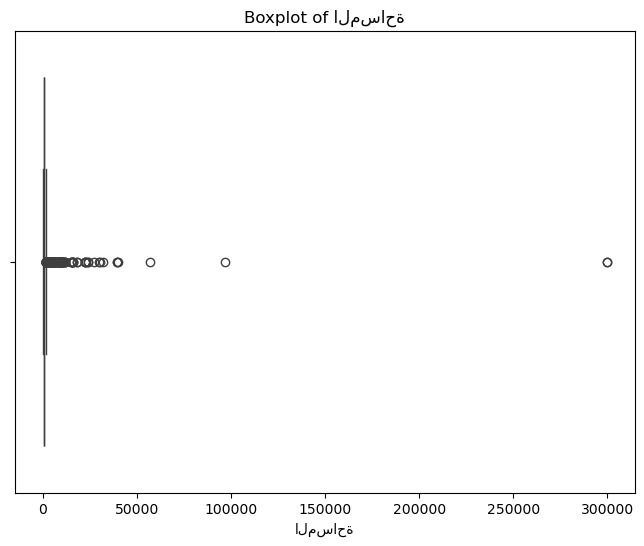

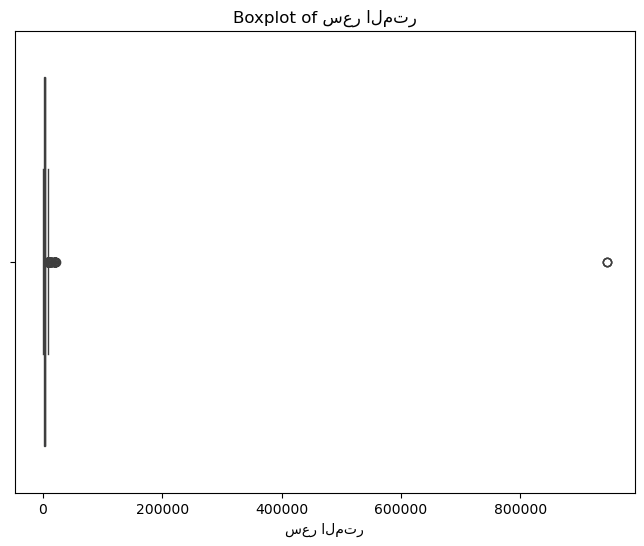

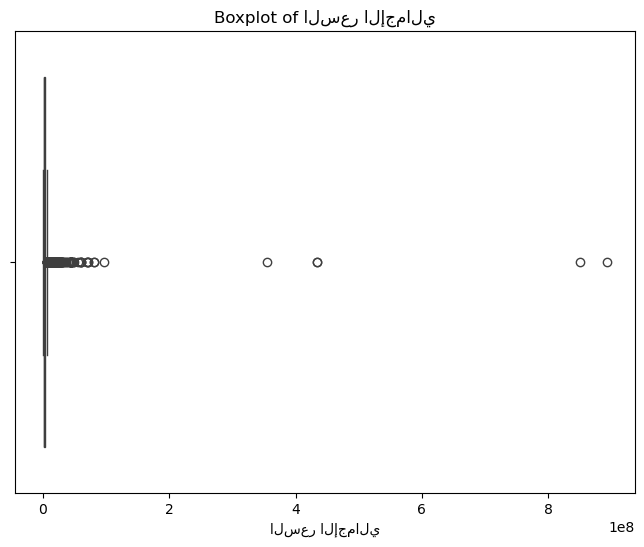

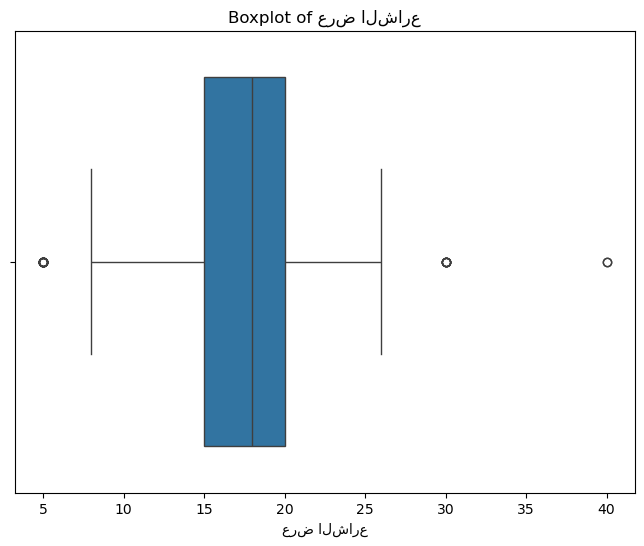

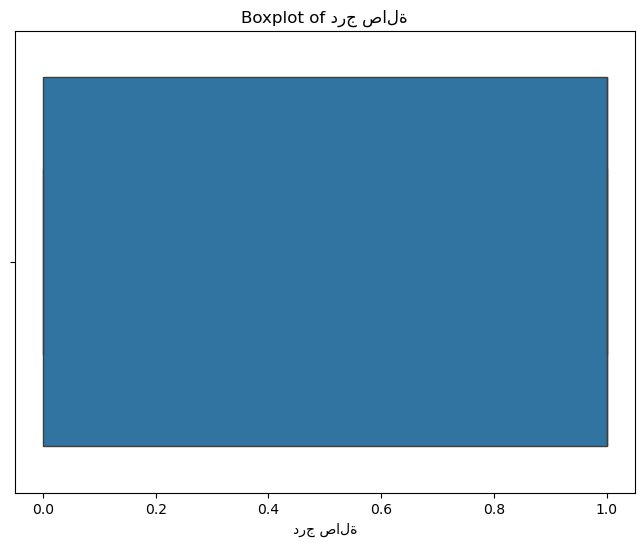

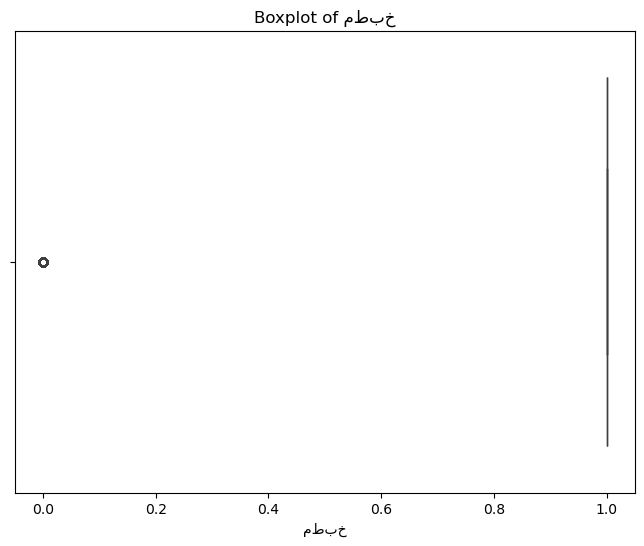

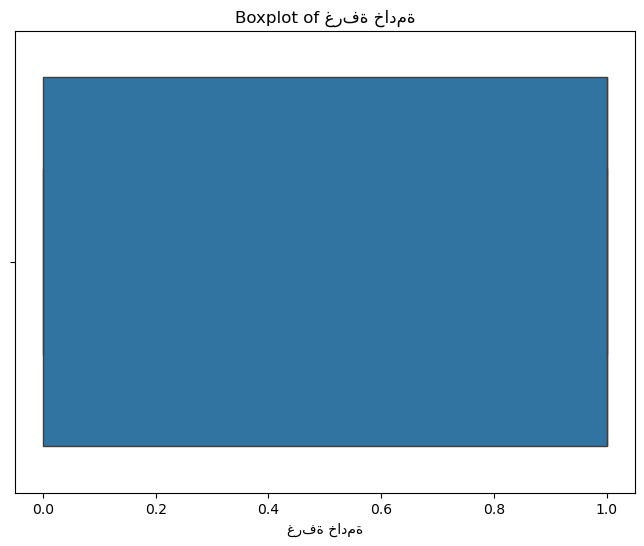

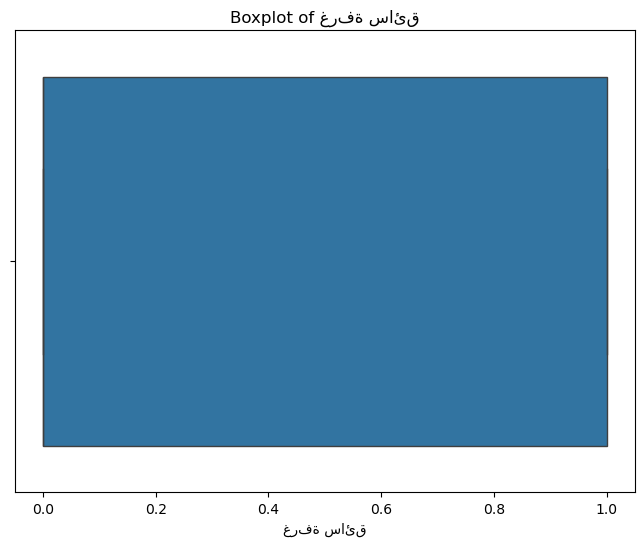

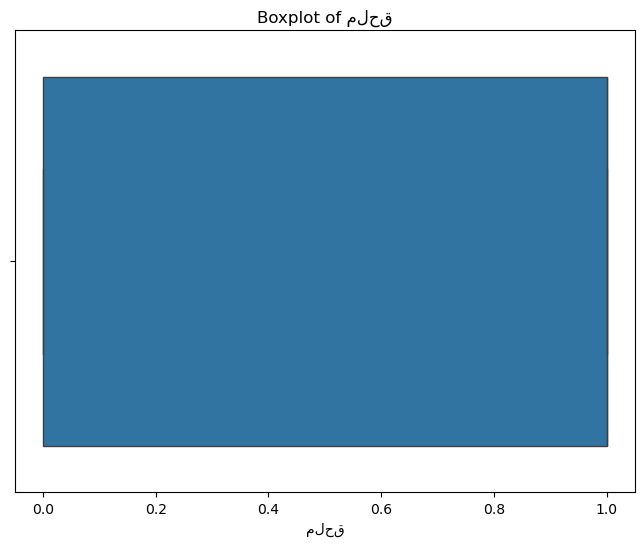

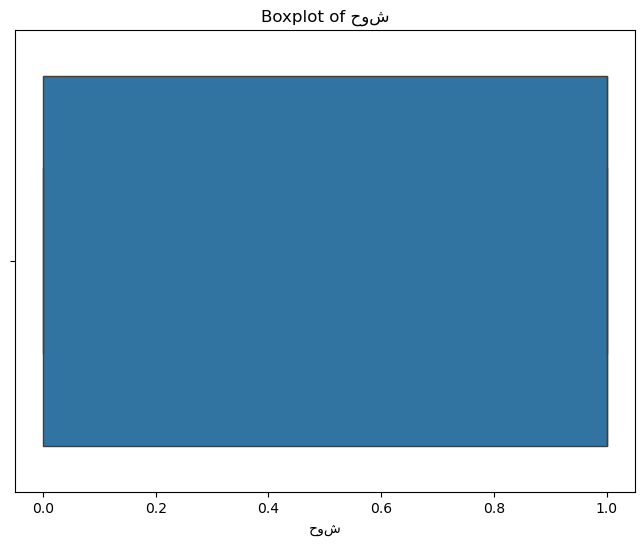

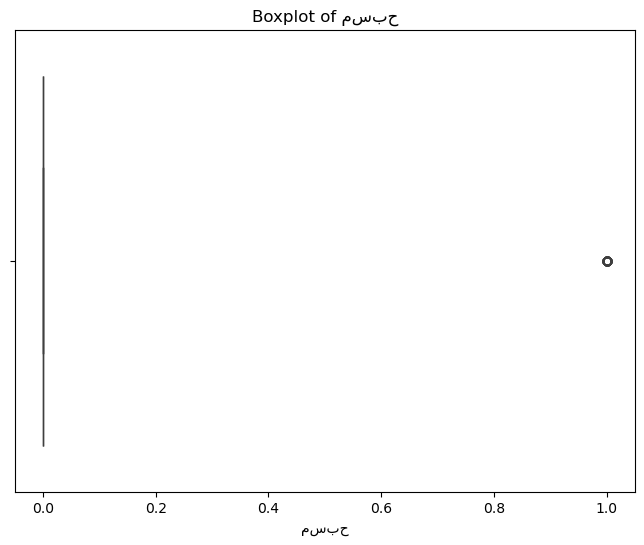

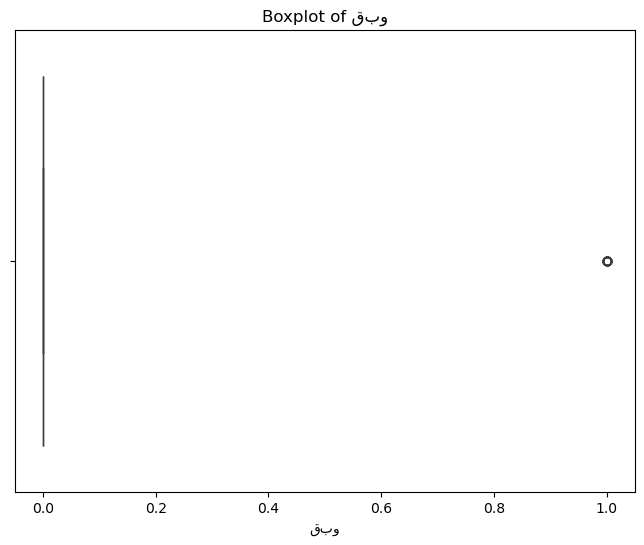

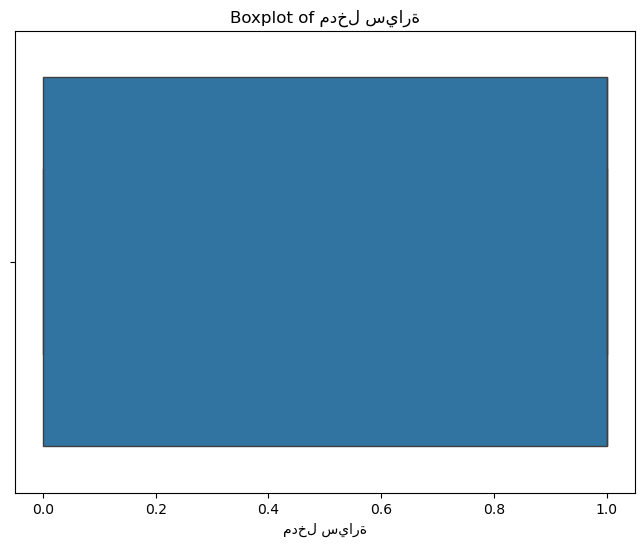

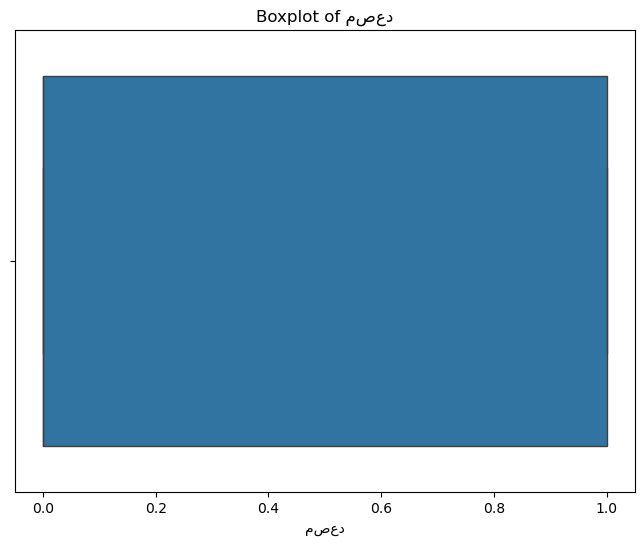

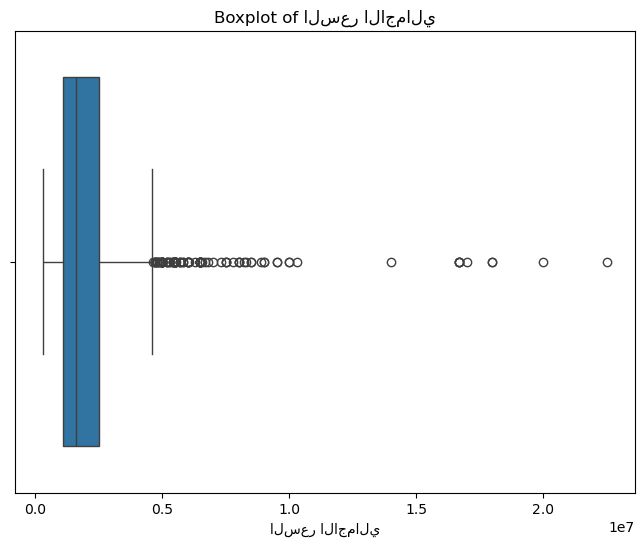

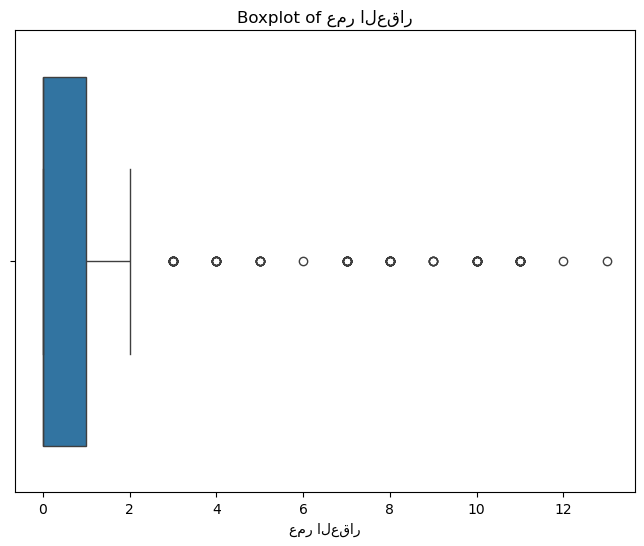

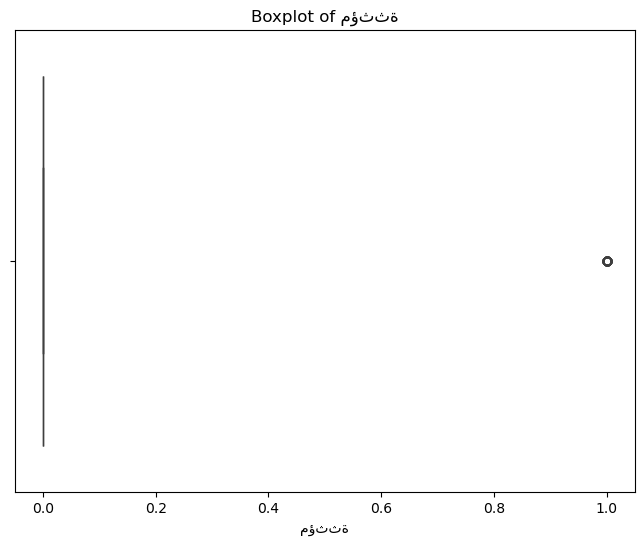

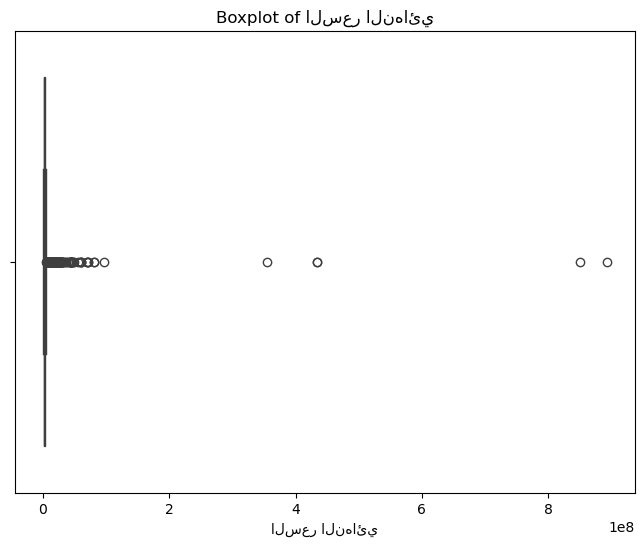

In [112]:

import seaborn as sns

# Plot boxplot to visualize outliers before removal
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=riyadh_all_aqaar[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


**What is an Outlier?**
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [114]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [115]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics

In [116]:
# go to delete ouliers

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


## riyadh Aqarr

In [121]:
riyadh_all_aqaar['عرض الشارع'].isnull().sum()

3331

In [122]:
riyadh_all_aqaar['عرض الشارع'].dtype

dtype('float64')

In [123]:
riyadh_all_aqaar['عرض الشارع'].fillna(0.0,inplace=True) # good or not
riyadh_all_aqaar['عرض الشارع'].isnull().sum()

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/2683846323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  riyadh_all_aqaar['عرض الشارع'].fillna(0.0,inplace=True) # good or not


0

In [124]:
riyadh_all_aqaar['الدور'].isnull().sum()

3319

In [125]:
def fill_null_level(x):
    if x['نوع العقار'] == 'أرض' or x['نوع العقار'] == 'فيلا':
        return "لايوجد"
    else:
        return 'غير معروف'

In [126]:
riyadh_all_aqaar['الدور'] = riyadh_all_aqaar.apply(lambda x : fill_null_level(x),axis=1)
riyadh_all_aqaar['الدور'].isnull().sum()

0

In [ ]:
riyadh_all_aqaar['عمر العقار'].isnull().sum()

In [ ]:
riyadh_all_aqaar['عمر العقار'].dtype

In [ ]:
riyadh_all_aqaar['عمر العقار'].fillna(0.0,inplace=True)
riyadh_all_aqaar['عمر العقار'].isnull().sum()

In [ ]:
riyadh_all_aqaar['مؤثثة'].isnull().sum()

In [ ]:
riyadh_all_aqaar['مؤثثة'].dtype

In [ ]:
riyadh_all_aqaar['مؤثثة'].fillna(0.0,inplace=True)
riyadh_all_aqaar['مؤثثة'].isnull().sum()

In [ ]:
riyadh_all_aqaar['غرفة سائق'].isnull().sum()

In [ ]:
riyadh_all_aqaar['غرفة سائق'].dtype

In [ ]:
riyadh_all_aqaar['غرفة سائق'].fillna(0.0,inplace=True)
riyadh_all_aqaar['غرفة سائق'].isnull().sum()

In [ ]:
riyadh_all_aqaar["غرفة خادمة"].isnull().sum()

In [ ]:
riyadh_all_aqaar["غرفة خادمة"].dtype

In [ ]:
riyadh_all_aqaar["غرفة خادمة"].fillna(0.0,inplace=True)
riyadh_all_aqaar["غرفة خادمة"].isnull().sum()

In [ ]:
riyadh_all_aqaar.isnull().sum().sort_values(ascending=False)

In [ ]:
riyadh_all_aqaar['مسبح'].fillna(0.0, inplace=True)

In [ ]:
riyadh_all_aqaar['درج صالة'].dtype

In [ ]:
cols_to_fill = ['درج صالة', 'ملحق', 'حوش']
riyadh_all_aqaar[cols_to_fill] = riyadh_all_aqaar[cols_to_fill].fillna(0.0)

In [ ]:
cols_to_fill = ['قبو','مدخل سيارة', 'مصعد','مطبخ']
riyadh_all_aqaar[cols_to_fill] = riyadh_all_aqaar[cols_to_fill].fillna(0.0)

In [ ]:
riyadh_all_aqaar['السعر الاجمالي'].dtype

In [ ]:
cols_to_fill = ['عدد الغرف','عدد الصالات', 'عدد الحمامات','السعر الاجمالي','سعر المتر','المساحة']
riyadh_all_aqaar[cols_to_fill] = riyadh_all_aqaar[cols_to_fill].fillna(0)

In [ ]:
cols_to_fill = ['السعر الاجمالي']
riyadh_all_aqaar[cols_to_fill] = riyadh_all_aqaar[cols_to_fill].fillna(0.0)

In [ ]:
riyadh_all_aqaar['الغرض'].dtype

In [ ]:
def fill_null_level(x):
    if x['نوع العقار'] =="شقة" or x['نوع العقار'] == 'فيلا':
        return "لايوجد"
    else:
        return 'غير معروف'

In [ ]:
riyadh_all_aqaar['الغرض'] = riyadh_all_aqaar.apply(lambda x : fill_null_level(x),axis=1)
riyadh_all_aqaar['الغرض'].isnull().sum()

In [ ]:
riyadh_all_aqaar['الواجهة'].fillna('غير معروف',inplace=True)
riyadh_all_aqaar['الواجهة'].isnull().sum()

In [ ]:
riyadh_all_aqaar.isnull().sum().sort_values(ascending=False)

In [127]:
riyadh_all_aqaar['درج صالة'] = riyadh_all_aqaar['درج صالة'].astype(float).astype('Int64')

In [128]:
riyadh_all_aqaar['مطبخ'] = riyadh_all_aqaar['مطبخ'].astype(float).astype('Int64')

In [129]:
riyadh_all_aqaar['غرفة خادمة'] = riyadh_all_aqaar['غرفة خادمة'].astype(float).astype('Int64')

In [130]:
riyadh_all_aqaar['غرفة سائق'] = riyadh_all_aqaar['غرفة سائق'].astype(float).astype('Int64')

In [131]:
riyadh_all_aqaar['ملحق'] = riyadh_all_aqaar['ملحق'].astype(float).astype('Int64')

In [132]:
riyadh_all_aqaar['حوش'] = riyadh_all_aqaar['حوش'].astype(float).astype('Int64')

In [133]:
riyadh_all_aqaar['مسبح'] = riyadh_all_aqaar['مسبح'].astype(float).astype('Int64')

In [134]:
riyadh_all_aqaar['قبو'] = riyadh_all_aqaar['قبو'].astype(float).astype('Int64')

In [135]:
riyadh_all_aqaar['مدخل سيارة'] = riyadh_all_aqaar['مدخل سيارة'].astype(float).astype('Int64')

In [136]:
riyadh_all_aqaar['مصعد'] = riyadh_all_aqaar['مصعد'].astype(float).astype('Int64')

In [137]:
riyadh_all_aqaar["السعر النهائي"] = np.where(riyadh_all_aqaar['السعر الاجمالي'].isna(),
             riyadh_all_aqaar['السعر الإجمالي'],
             np.where(riyadh_all_aqaar['السعر الإجمالي'].isna(),
                      riyadh_all_aqaar['السعر الاجمالي'],
                      riyadh_all_aqaar['السعر الاجمالي']))
# dtale.show(riyadh_all_aqaar)


In [138]:
riyadh_all_aqaar['المدينة'].value_counts()

المدينة
الرياض     3489
حريملاء     253
الدرعية      41
رماح          5
الجبيلة       3
العيينة       2
ضرما          2
الخرج         1
Name: count, dtype: int64

In [139]:
city_list = ['الرياض', 'حريملاء', 'الدرعية', 'رماح', 'الجبيلة', 'ضرما', 'العيينة', 'الخرج']

# Define the function to clean city names
def clean_city(x):
    # Ensure x is treated as a string and strip it
    x = str(x).strip()

    if x != "الرياض" and x not in city_list:
        return "الرياض"
    else:
        return x



In [140]:
riyadh_all_aqaar['المدينة']=riyadh_all_aqaar['المدينة'].apply(clean_city)
riyadh_all_aqaar['المدينة'].value_counts()

المدينة
الرياض     3489
حريملاء     253
الدرعية      41
رماح          5
الجبيلة       3
العيينة       2
ضرما          2
الخرج         1
Name: count, dtype: int64

In [141]:
riyadh_all_aqaar.rename(columns={
    'نوع العقار': 'Property Type',
    'الغرض': 'Purpose',
    'المدينة': 'City',
    'الحي': 'Neighborhood',
    'الواجهة': 'Facade',
    'المساحة': 'Area',
    'سعر المتر': 'Price per Meter',
    'السعر الإجمالي': 'Total Price',
    'عدد الغرف': 'Number of Rooms',
    'عدد الصالات': 'Number of Living Rooms',
    'عدد الحمامات': 'Number of Bathrooms',
    'عرض الشارع': 'Street Width',
    'درج صالة': 'Hallway',
    'مطبخ': 'Kitchen',
    'غرفة خادمة': 'Maid Room',
    'غرفة سائق': 'Driver Room',
    'ملحق': 'Annex',
    'حوش': 'Yard',
    'مسبح': 'Swimming Pool',
    'قبو': 'Basement',
    'مدخل سيارة': 'Car Entrance',
    'مصعد': 'Elevator',
    'السعر الاجمالي': 'Total Price1',
    'الدور': 'Floor',
    'عمر العقار': 'Property Age',
    'مؤثثة': 'Furnished',
    "السعر النهائي":'Final Price'
},inplace =True)

In [142]:
riyadh_all_aqaar.columns

Index(['Property Type', 'Purpose', 'City', 'Neighborhood', 'Facade', 'Area',
       'Price per Meter', 'Total Price', 'Number of Rooms',
       'Number of Living Rooms', 'Number of Bathrooms', 'Street Width',
       'Hallway', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex', 'Yard',
       'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator', 'Total Price1',
       'Floor', 'Property Age', 'Furnished', 'Final Price'],
      dtype='object')

In [143]:
riyadh_all_aqaar[riyadh_all_aqaar['Final Price'] < 100]

,Property Type,Purpose,City,Neighborhood,Facade,Area,Price per Meter,Total Price,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Hallway,Kitchen,Maid Room,Driver Room,Annex,Yard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price1,Floor,Property Age,Furnished,Final Price


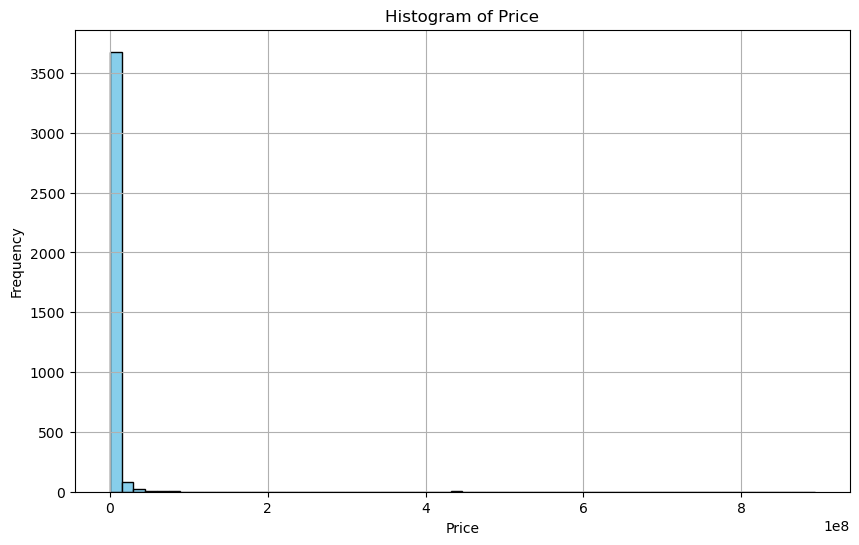

In [144]:
plt.figure(figsize=(10, 6))
plt.hist(riyadh_all_aqaar['Final Price'], bins=60, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [145]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = riyadh_all_aqaar['Final Price'].quantile(0.25)
    Q3 = riyadh_all_aqaar['Final Price'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame by keeping only the rows within the bounds
    riyadh_all_aqaar = riyadh_all_aqaar[(riyadh_all_aqaar['Final Price'] >= lower_bound) & (riyadh_all_aqaar['Final Price'] <= upper_bound)]

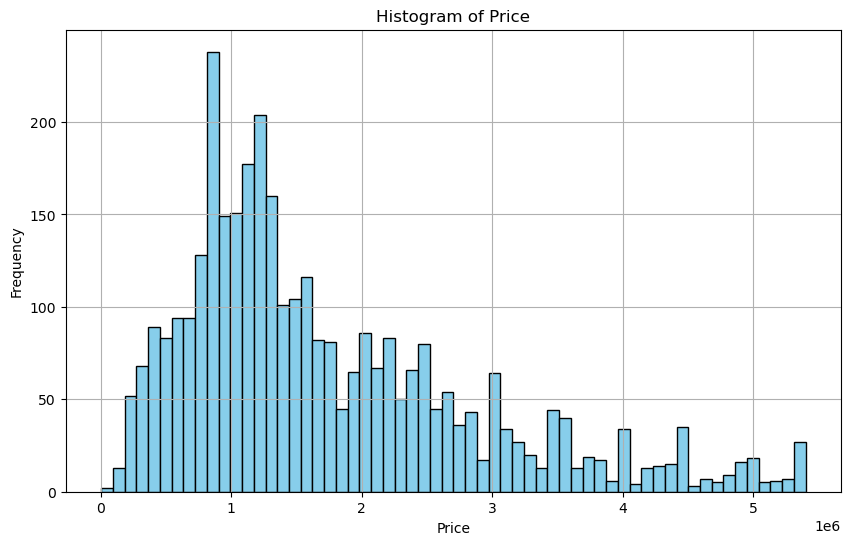

In [146]:
plt.figure(figsize=(10, 6))
plt.hist(riyadh_all_aqaar['Final Price'], bins=60, color='skyblue', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [147]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = riyadh_all_aqaar['Area'].quantile(0.25)
    Q3 = riyadh_all_aqaar['Area'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame by keeping only the rows within the bounds
    riyadh_all_aqaar = riyadh_all_aqaar[(riyadh_all_aqaar['Area'] >= lower_bound) & (riyadh_all_aqaar['Area'] <= upper_bound)]

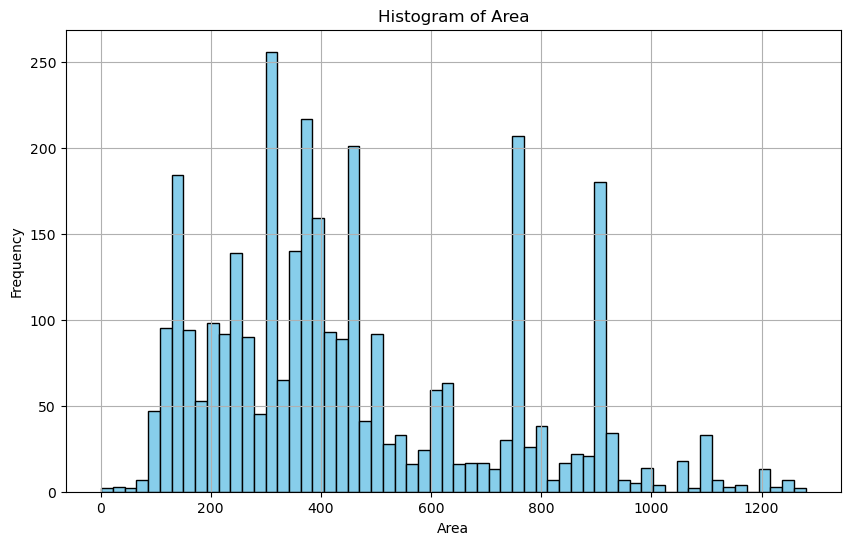

In [148]:
plt.figure(figsize=(10, 6))
plt.hist(riyadh_all_aqaar['Area'], bins=60, color='skyblue', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [149]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = riyadh_all_aqaar['Area'].quantile(0.25)
    Q3 = riyadh_all_aqaar['Area'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame by keeping only the rows within the bounds
    riyadh_all_aqaar = riyadh_all_aqaar[(riyadh_all_aqaar['Area'] >= lower_bound) & (riyadh_all_aqaar['Area'] <= upper_bound)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


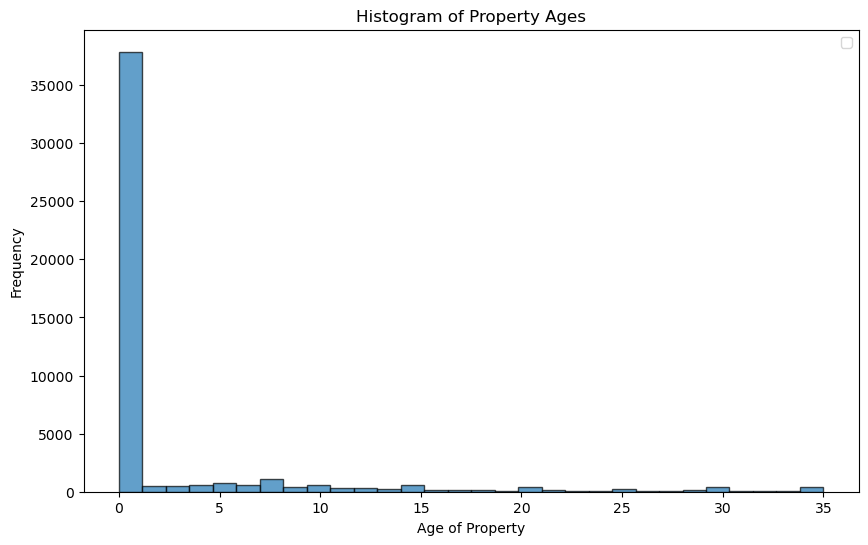

In [150]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(riyadh_housing['propertyAge'], bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Histogram of Property Ages')
plt.xlabel('Age of Property')
plt.ylabel('Frequency')

# Display legend
plt.legend()

# Show plot
plt.show()
# there is an outliers on propertyAge but it's natural outlier

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


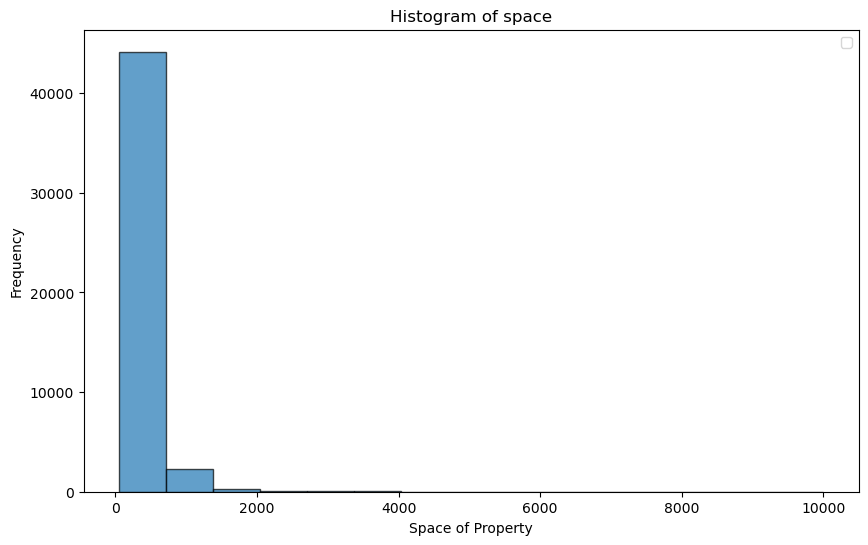

In [151]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(riyadh_housing['space'], bins=15, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Histogram of space')
plt.xlabel('Space of Property')
plt.ylabel('Frequency')

# Display legend
plt.legend()

# Show plot
plt.show()
# there is an outliers on space but it's natural outlier

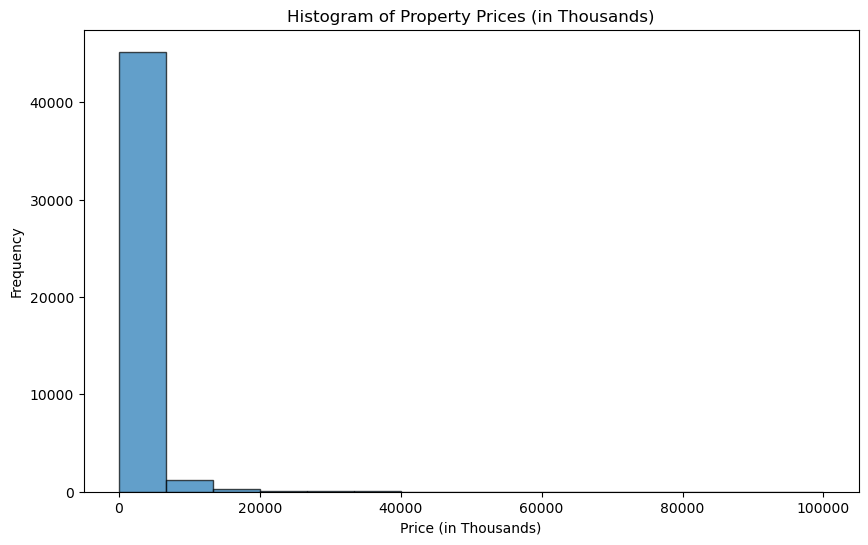

In [152]:
# Create a histogram of the price in thousands (dividing by 1000)
plt.figure(figsize=(10, 6))
plt.hist(riyadh_housing['price'] / 1000, bins=15, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Histogram of Property Prices (in Thousands)')
plt.xlabel('Price (in Thousands)')
plt.ylabel('Frequency')

# Show plot
plt.show()
# there is an outliers on space but it's natural outlier

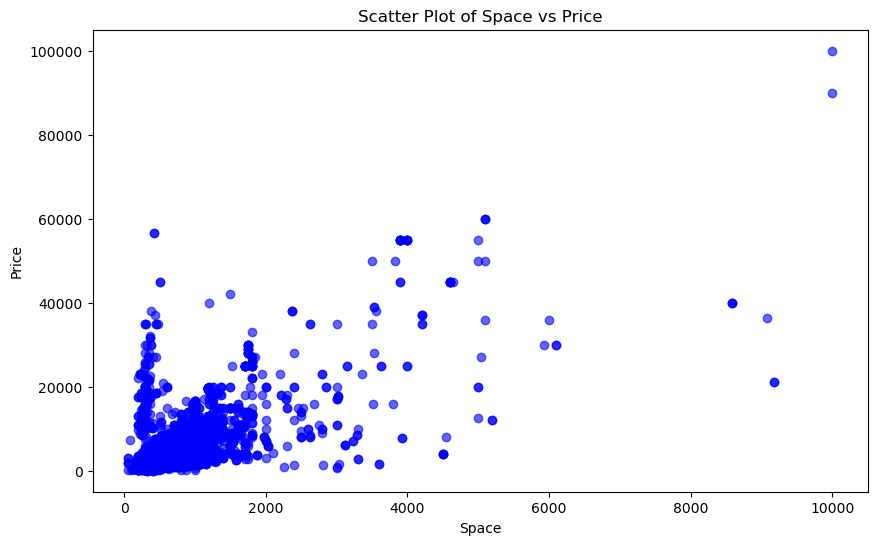

In [153]:
plt.figure(figsize=(10, 6))
plt.scatter(riyadh_housing['space'], riyadh_housing['price'] / 1000, color='blue', alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Space vs Price')
plt.xlabel('Space')
plt.ylabel('Price')

# Show the plot
plt.show()
# there is an outliers on space but it's natural outlier

## riyadh_housing

In [155]:
riyadh_housing['lounges'].isnull().sum()

1118

In [156]:
riyadh_housing['lounges'].fillna(0,inplace=True)
riyadh_housing['lounges'].isnull().sum()

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/1012628878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  riyadh_housing['lounges'].fillna(0,inplace=True)


0

In [157]:
riyadh_housing['streetWidth'].fillna(0.0,inplace=True)
riyadh_housing['streetWidth'].isnull().sum()

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/3004087322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  riyadh_housing['streetWidth'].fillna(0.0,inplace=True)


0

In [158]:
riyadh_housing[(riyadh_housing['price'].isnull()) & (riyadh_housing['square price'].isnull()) ]

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
253,283,شرقية,4,1,4,30.0,0,0,0,0,1,1,1,1,1,360,0,0,0,0,0,0,الشفا,جنوب الرياض,NaN,NaN
9457,10452,شرقية,1,1,3,5.0,0,0,0,1,0,1,0,1,0,450,0,0,0,0,0,0,طويق,غرب الرياض,NaN,NaN


In [159]:
riyadh_housing['price'].fillna(0.0,inplace=True)
riyadh_housing['price'].isnull().sum()

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/597317861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  riyadh_housing['price'].fillna(0.0,inplace=True)


0

In [160]:
riyadh_housing['square price'].fillna(0.0,inplace=True)
riyadh_housing['square price'].isnull().sum()

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/3034107678.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  riyadh_housing['square price'].fillna(0.0,inplace=True)


0

In [161]:
riyadh_housing.isnull().sum().sort_values(ascending=False)

Unnamed: 0       0
front            0
price            0
location         0
neighbourhood    0
basement         0
pool             0
furnihsed        0
elevator         0
maidRoom         0
apartments       0
space            0
duplex           0
garage           0
outdoorRoom      0
kitchen          0
patio            0
tent             0
driverRoom       0
propertyAge      0
stairs           0
streetWidth      0
bathrooms        0
lounges          0
rooms            0
square price     0
dtype: int64

In [162]:
def correct_apartments (x):
    x = str(x)
    if '+' in x:
        return x
    return int(x)

In [163]:
riyadh_housing['apartments']= riyadh_housing['apartments'].map(lambda x : correct_apartments (x))

In [164]:
riyadh_housing['apartments'].value_counts()

apartments
0      26809
1       9373
2       8435
3       1703
4        411
5         29
6         12
8          9
7          7
10         7
12         6
15         5
11         4
30+        4
13         3
14         3
23         2
20         2
9          1
16         1
Name: count, dtype: int64

In [165]:
riyadh_housing['price'].values

array([1050000., 3000000., 2000000., ..., 1000000., 2300000., 4100000.])

In [166]:
# reFormat the price to make it easy to read
riyadh_housing['formatted_price'] = riyadh_housing['price'].apply(lambda x: f'{round(x / 1000)}K')

In [167]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [169]:
# go back to 7th dimension Accuracy

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [172]:
riyadh_all_aqaar.columns

Index(['Property Type', 'Purpose', 'City', 'Neighborhood', 'Facade', 'Area',
       'Price per Meter', 'Total Price', 'Number of Rooms',
       'Number of Living Rooms', 'Number of Bathrooms', 'Street Width',
       'Hallway', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex', 'Yard',
       'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator', 'Total Price1',
       'Floor', 'Property Age', 'Furnished', 'Final Price'],
      dtype='object')

## realEstate

In [174]:
realEstate.isnull().sum()

user_id           0
id                0
title             0
price             0
content          94
beds              0
livings           2
wc                0
area            175
street_width    210
age             705
ketchen          17
ac               19
furnished        45
path              0
district          0
review          399
onMarket          0
IsRent            0
dtype: int64

In [175]:
# Function to extract apartment type, street/road name, and neighborhood
def extract_info(title):
    # Extract the apartment type (e.g., شقة, فيلا, استوديو)
    apartment_type = title.split(' ')[0]

    # Extract the street or road name (e.g., شارع التغلبي, طريق الملك فهد)
    street_name = None
    if 'شارع' in title:
        street_name = title.split('شارع')[1].split('،')[0].strip()
    elif 'طريق' in title:
        street_name = title.split('طريق')[1].split('،')[0].strip()

    return apartment_type, street_name

# Apply the function and create new columns
realEstate[['apartment_type', 'street_name']] = realEstate['title'].apply(
    lambda x: pd.Series(extract_info(x))
)


In [176]:
realEstate['apartment_type'][0]

'شقة'

In [177]:
#added region columns that extract from path culomns
realEstate['region'] = realEstate['path'].map(lambda x: x.split('/')[3])

In [178]:
realEstate['region'].value_counts()

region
شمال-الرياض    3613
شرق-الرياض     2356
غرب-الرياض      544
وسط-الرياض      136
جنوب-الرياض     113
Name: count, dtype: int64

In [179]:
realEstate.shape

(6762, 22)

In [180]:
# format the price column so that large numbers are displayed in a readable format (e.g., 1050000.0 as 1M or 105K)

# def formate_price(value):
#     if value >= 1_000_000_000: #Billions
#         return f"{value / 1_000_000_000:.1f}B"
#     elif value >= 1_000_000: #Millions
#         return f"{value / 1_000_000:.1f}M"
#     elif value >= 1_000: # Thousands
#         return f"{value / 1_000:.1f}K"
#     else:
#         return str(value)

# realEstate['formate_price'] = realEstate['price'].apply(formate_price)


In [181]:
realEstate['furnished'].value_counts()


furnished
0.0    6192
1.0     525
Name: count, dtype: int64

In [182]:
realEstate['furnished'].isnull().sum()

45

In [183]:
import numpy as np

# أولاً، تعبئة القيم الفارغة في 'furnished' بالقيمة 0
realEstate['furnished'] = realEstate['furnished'].fillna(0)

# تحديث 'furnished' إلى 1 إذا كان 'content' يحتوي على "مفروشة" أو "موثثة"
realEstate['furnished'] = np.where(
    realEstate['content'].str.contains('مفروشة|مؤثثة', case=False, na=False),
    1,  # تعيين القيمة إلى 1 إذا وُجدت أي من الكلمتين
    realEstate['furnished']  # إبقاء القيمة كما هي إذا لم تنطبق الشروط
)


In [184]:
realEstate.head(2)

,user_id,id,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,review,onMarket,IsRent,apartment_type,street_name,region
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,5.00,17,False,شقة,التغلبي,شرق-الرياض
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الفيحاء/شارع...,حي الفيحاء,4.33,5,True,شقة,الاقتصاد,شرق-الرياض


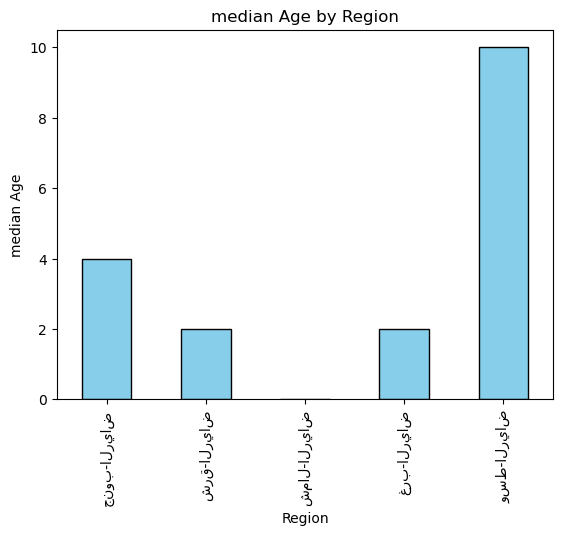

In [185]:

#Assuming 'realEstate' is your DataFrame and it contains 'age' and 'region' columns
#Grouping by region and calculating the average age for each region
age_by_region = realEstate.groupby('region')['age'].median()

#Plotting the resultregion
age_by_region.plot(kind='bar', color='skyblue', edgecolor='black')

#Adding labels and title
plt.xlabel('Region')
plt.ylabel('median Age')
plt.title('median Age by Region')

#Show the plot
plt.show()

In [186]:
median_age_by_region = realEstate.groupby('region')['age'].transform('median')
realEstate['age'] = realEstate['age'].fillna(round(median_age_by_region))

In [187]:
realEstate['age'].isnull().sum()

0

In [188]:
realEstate.isnull().sum()

user_id             0
id                  0
title               0
price               0
content            94
beds                0
livings             2
wc                  0
area              175
street_width      210
age                 0
ketchen            17
ac                 19
furnished           0
path                0
district            0
review            399
onMarket            0
IsRent              0
apartment_type      0
street_name       810
region              0
dtype: int64

In [189]:
realEstate[realEstate['livings'].isnull()]

,user_id,id,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,review,onMarket,IsRent,apartment_type,street_name,region
2923,2243986,4555633,شقة للإيجار في طريق الملك فهد الفرعي ، حي المؤ...,80000,يوجد شقق استوديو للايجار السنوي فقط في أبراج د...,1,NaN,1,43.0,NaN,0.0,1.0,1.0,1.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-المؤتمرات/ط...,حي المؤتمرات,NaN,28,False,شقة,الملك فهد الفرعي,شمال-الرياض
5752,200401,4215123,شقة للإيجار في شارع وادي السرح ، حي الوادي ، ا...,18000,للايجار غرفة عزابي بعمارة بحي الوادي بالرياض ع...,1,NaN,1,50.0,18.0,6.0,NaN,1.0,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-الوادي/شارع...,حي الوادي,4.23,137,False,شقة,وادي السرح,شمال-الرياض


In [190]:
realEstate['livings'].fillna(0,inplace=True)

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/4150294299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  realEstate['livings'].fillna(0,inplace=True)


In [191]:
realEstate[realEstate['livings'].isnull()]

,user_id,id,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,review,onMarket,IsRent,apartment_type,street_name,region


In [192]:
realEstate[realEstate['ac'].isnull()]

,user_id,id,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,review,onMarket,IsRent,apartment_type,street_name,region
109,916881,4573584,شقة للإيجار في شارع محمد بن طولون ، حي العارض ...,40000,New flat in Alarid\r\n3 room \r\nOne living ro...,3,1.0,2,20.0,NaN,1.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,5.00,23,False,شقة,محمد بن طولون,شمال-الرياض
917,228779,4443569,شقة للإيجار في شارع محمد السمدي ، حي العارض ، ...,33000,شقه جديده الدور الاول مدخل مشترك عداد كهرب مست...,3,1.0,2,130.0,NaN,0.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,5.00,59,True,شقة,محمد السمدي,شمال-الرياض
1501,1314448,4567286,شقة للإيجار في شارع حبيب الحنظلي ، حي العريجاء...,26000,شقة للإيجار بحي العريجاء \r\nتتكون : 4 غرف - ص...,4,1.0,2,150.0,NaN,2.0,1.0,NaN,0.0,/شقق-للإيجار/الرياض/غرب-الرياض/حي-العريجاء-الو...,حي العريجاء الوسطى,4.57,14,True,شقة,حبيب الحنظلي,غرب-الرياض
1737,928675,4538767,شقة للإيجار في شارع البطحاء ، حي العود ، الريا...,13000,مللحق للايجار حي البطحاء 3 غرف وحمام ومطبخ صغي...,3,1.0,1,100.0,NaN,34.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/وسط-الرياض/حي-العود/شارع-ا...,حي العود,4.38,33,False,شقة,البطحاء,وسط-الرياض
2514,7,4254484,شقة للإيجار في شارع الريان ، حي النفل ، الرياض...,90000,للايجار شقه جديده تشطيب راقي 140م\r\n 3 غرف و...,3,1.0,3,140.0,36.0,0.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-النفل/شارع-...,حي النفل,3.89,123,True,شقة,الريان,شمال-الرياض
2781,181573,4523633,شقة للإيجار في شارع مجزاة بن ثور السدوسي ، حي ...,35000,دور علوي\r\nتشطيب VIP في حي البيان \r\n🔸غرفتين...,5,3.0,4,200.0,NaN,3.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الشرق/شارع-م...,حي الشرق,4.15,31,True,شقة,مجزاة بن ثور السدوسي,شرق-الرياض
2935,916881,4573566,شقة للإيجار في شارع محمد بن طولون ، حي العارض ...,40000,NaN,3,1.0,2,20.0,NaN,1.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,5.00,23,False,شقة,محمد بن طولون,شمال-الرياض
3121,321665,4566594,شقة للإيجار في شارع أبي الدرداء ، حي الروضة ، ...,47000,شقة دوبلكس - 7 غرف و3 صالات و3 دورات مياه ومط...,7,3.0,3,189.0,1.0,20.0,1.0,NaN,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الروضة/شارع-...,حي الروضة,5.00,25,False,شقة,أبي الدرداء,شرق-الرياض
3184,2617184,4580780,شقة للإيجار في شارع ابن معتوق ، حي أم الحمام ا...,65000,شقه دورين مدخل مستقل ومصعد مستقل جديدة تشطيب ف...,3,2.0,3,170.0,15.0,0.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/غرب-الرياض/حي-ام-الحمام-ال...,حي ام الحمام الغربي,5.00,21,False,شقة,ابن معتوق,غرب-الرياض
3268,928675,4538737,شقة للإيجار في شارع البتراء ، حي العود ، الريا...,15000,شقة للايجار حي البطحاء قريبه من التعمير عزاب 3...,3,1.0,1,120.0,NaN,34.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/وسط-الرياض/حي-جبرة/شارع-ال...,حي جبرة,4.38,33,False,شقة,البتراء,وسط-الرياض


In [193]:
realEstate[realEstate['ketchen'].isnull()]

,user_id,id,title,price,content,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,path,district,review,onMarket,IsRent,apartment_type,street_name,region
109,916881,4573584,شقة للإيجار في شارع محمد بن طولون ، حي العارض ...,40000,New flat in Alarid\r\n3 room \r\nOne living ro...,3,1.0,2,20.0,NaN,1.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,5.00,23,False,شقة,محمد بن طولون,شمال-الرياض
917,228779,4443569,شقة للإيجار في شارع محمد السمدي ، حي العارض ، ...,33000,شقه جديده الدور الاول مدخل مشترك عداد كهرب مست...,3,1.0,2,130.0,NaN,0.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,5.00,59,True,شقة,محمد السمدي,شمال-الرياض
1237,1448277,4557280,شقة للإيجار في شارع عبدالله بن شايق ، حي قرطبة...,45000,شقه دور ثاني \r\nغرفتين نوم راكب مكيفات\r\nصال...,3,1.0,2,300.0,15.0,0.0,NaN,1.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-قرطبة/شارع-ع...,حي قرطبة,5.00,28,False,شقة,عبدالله بن شايق,شرق-الرياض
1737,928675,4538767,شقة للإيجار في شارع البطحاء ، حي العود ، الريا...,13000,مللحق للايجار حي البطحاء 3 غرف وحمام ومطبخ صغي...,3,1.0,1,100.0,NaN,34.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/وسط-الرياض/حي-العود/شارع-ا...,حي العود,4.38,33,False,شقة,البطحاء,وسط-الرياض
2514,7,4254484,شقة للإيجار في شارع الريان ، حي النفل ، الرياض...,90000,للايجار شقه جديده تشطيب راقي 140م\r\n 3 غرف و...,3,1.0,3,140.0,36.0,0.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-النفل/شارع-...,حي النفل,3.89,123,True,شقة,الريان,شمال-الرياض
2769,1448277,4557327,شقة للإيجار في شارع عبدالله بن شايق ، حي قرطبة...,40000,غرفتين نوم مكيفه\r\nصالة راكب مكيف\r\nمجلس رجا...,3,1.0,2,300.0,NaN,0.0,NaN,1.0,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-قرطبة/شارع-ع...,حي قرطبة,5.00,28,False,شقة,عبدالله بن شايق,شرق-الرياض
2781,181573,4523633,شقة للإيجار في شارع مجزاة بن ثور السدوسي ، حي ...,35000,دور علوي\r\nتشطيب VIP في حي البيان \r\n🔸غرفتين...,5,3.0,4,200.0,NaN,3.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شرق-الرياض/حي-الشرق/شارع-م...,حي الشرق,4.15,31,True,شقة,مجزاة بن ثور السدوسي,شرق-الرياض
2935,916881,4573566,شقة للإيجار في شارع محمد بن طولون ، حي العارض ...,40000,NaN,3,1.0,2,20.0,NaN,1.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/شمال-الرياض/حي-العارض/شارع...,حي العارض,5.00,23,False,شقة,محمد بن طولون,شمال-الرياض
3184,2617184,4580780,شقة للإيجار في شارع ابن معتوق ، حي أم الحمام ا...,65000,شقه دورين مدخل مستقل ومصعد مستقل جديدة تشطيب ف...,3,2.0,3,170.0,15.0,0.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/غرب-الرياض/حي-ام-الحمام-ال...,حي ام الحمام الغربي,5.00,21,False,شقة,ابن معتوق,غرب-الرياض
3268,928675,4538737,شقة للإيجار في شارع البتراء ، حي العود ، الريا...,15000,شقة للايجار حي البطحاء قريبه من التعمير عزاب 3...,3,1.0,1,120.0,NaN,34.0,NaN,NaN,0.0,/شقق-للإيجار/الرياض/وسط-الرياض/حي-جبرة/شارع-ال...,حي جبرة,4.38,33,False,شقة,البتراء,وسط-الرياض


In [194]:
realEstate['ac'].fillna(0,inplace=True)

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/2826909642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  realEstate['ac'].fillna(0,inplace=True)


In [195]:
realEstate['ketchen'].fillna(0,inplace=True)

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/138394781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  realEstate['ketchen'].fillna(0,inplace=True)


In [196]:
realEstate.isnull().sum()

user_id             0
id                  0
title               0
price               0
content            94
beds                0
livings             0
wc                  0
area              175
street_width      210
age                 0
ketchen             0
ac                  0
furnished           0
path                0
district            0
review            399
onMarket            0
IsRent              0
apartment_type      0
street_name       810
region              0
dtype: int64

In [197]:
realEstate["street_name"].fillna("Unknown", inplace=True)

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/541721563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  realEstate["street_name"].fillna("Unknown", inplace=True)


In [198]:
realEstate.isnull().sum()

user_id             0
id                  0
title               0
price               0
content            94
beds                0
livings             0
wc                  0
area              175
street_width      210
age                 0
ketchen             0
ac                  0
furnished           0
path                0
district            0
review            399
onMarket            0
IsRent              0
apartment_type      0
street_name         0
region              0
dtype: int64

In [199]:
realEstate["area"].fillna(0,inplace=True)

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/2119610856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  realEstate["area"].fillna(0,inplace=True)


In [200]:
realEstate['street_width'].fillna(0,inplace=True)

/var/folders/51/hnvr5tc90p715_n4z05ltm1w0000gn/T/ipykernel_50638/2857855432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  realEstate['street_width'].fillna(0,inplace=True)


In [201]:
realEstate.isnull().sum()

user_id             0
id                  0
title               0
price               0
content            94
beds                0
livings             0
wc                  0
area                0
street_width        0
age                 0
ketchen             0
ac                  0
furnished           0
path                0
district            0
review            399
onMarket            0
IsRent              0
apartment_type      0
street_name         0
region              0
dtype: int64

In [202]:
realEstate.shape

(6762, 22)

 #check for outliers in price

In [204]:
realEstate.groupby('region')['price'].min()

region
جنوب-الرياض    1150
شرق-الرياض       75
شمال-الرياض    1000
غرب-الرياض      250
وسط-الرياض       55
Name: price, dtype: int64

In [205]:
realEstate.groupby('region')['price'].median()

region
جنوب-الرياض    18000.0
شرق-الرياض     27000.0
شمال-الرياض    45000.0
غرب-الرياض     24000.0
وسط-الرياض     15000.0
Name: price, dtype: float64

In [206]:
x = realEstate.loc[realEstate['price'] == 75, ['content','region']]

In [207]:
y = realEstate.loc[realEstate['price'] == 55, ['content','region']]

In [208]:
z= realEstate.loc[realEstate['price'] == 250, ['content','region']]

In [209]:
a= realEstate.loc[realEstate['price'] == 1000, ['content','region']]

In [210]:
filtered_data = realEstate[realEstate['price'].apply(lambda x :len(str(int(x))) ==4)]

In [211]:
# Define a function to determine the rent type
def determine_rent_type(content):
    # Convert the content to a string (handles non-string values like NaN)
    content = str(content)

    monthly_keywords = ['شهري', 'الشهري', 'month', 'monthly']
    yearly_keywords = ['سنه', 'السنه', 'years', 'year', 'annually']

    # Check for yearly keywords first
    if any(keyword in content for keyword in yearly_keywords):
        return 'سنوي'
    # Check for monthly keywords
    elif any(keyword in content for keyword in monthly_keywords):
        return 'شهري'
    else:
        return 'غير محدد'

# Apply the function to create a new column 'rent_type'
realEstate['rent_type'] = realEstate['content'].apply(determine_rent_type)

In [212]:
realEstate.loc[(realEstate['rent_type']== 'غير محدد') & (realEstate['price'] ==6500),'content']

322     شقة عزاب نظيفه؛ وبموقع متميز (خلف مركز الجفال ...
2290    شقه ٢ غرفه وصاله و مطبخ و حمام  عزاب\r\n\r\nلل...
Name: content, dtype: object

In [213]:
realEstate.loc[322,'content']

'شقة عزاب نظيفه؛ وبموقع متميز (خلف مركز الجفال للكمبيوتر) ع طريق الملك فهد، وبالقرب من المراكز التجارية والمناطق الحيوية؛ ومتابعة مستمره للعقار (الصيانة، ونحوها). \r\n\r\nالعمارة عبارة عن شقة في الدور أرضي + دور علوي (الشقة المعروضة بهذا الاعلان) + شقة في السطح. \r\n\r\nمستأجري الشقتين (الأرضية والعلويه) جداً محترمين، وبعدد قليل من السكان لكلا الشقتين (لا يوجد ازعاج).\r\n\r\nالماء: مجاني. \r\nالكهرباء: بعداد مستقل لكل شقة.'

In [214]:
#if the rent_type do not mention in content column
# and  price > 10000  or price is a two-digit or three-digit number and rent_type == 'غير محدد'
condition= (realEstate['price'] > 10000) | (realEstate['price'] >= 10) | (realEstate['price'] < 1000) & (realEstate['rent_type'] == 'غير محدد')



In [215]:
#if the rent_type do not mention in content column  and the price above  10,000 it consider سنوي
realEstate.loc[condition, 'rent_type'] = 'سنوي'

##### Adjust Price Based on rent_type:
###### If rent_type is 'سنوي':
> * Multiply by 10000 for 1-digit prices.
> * Multiply by 1000 for 2-digit prices.
> * Multiply by 100 for 3-digit prices.
> * Multiply by 10 for 4-digit prices.
> * Leave the price unchanged otherwise.
###### If rent_type is 'شهري':
> * Multiply by 1000 for 1-digit prices.
> * Multiply by 100 for 2-digit prices.
> * Multiply by 10 for 3-digit prices.
> * Leave the price unchanged otherwise.

In [217]:
realEstate = realEstate.drop(['title','content','onMarket','path'],axis = 1)

In [218]:
# Function to determine the adjusted price
def adjust_price(row):
    price = row['price']
    rent_type = row['rent_type']

    # Ensure price is a valid number and not NaN
    if pd.isna(price):
        return price

    # Convert price to an integer
    price = int(price)

    # Get the number of digits in the price
    num_digits = len(str(price))

    # Adjust price based on rent_type and number of digits
    if rent_type == 'سنوي':
        if num_digits == 1:
            return price * 10000
        elif num_digits == 2:
            return price * 1000
        elif num_digits == 3:
            return price * 100
        elif num_digits == 4:
            return price * 10
        else:
            return price
    elif rent_type == 'شهري':
        if num_digits == 1:
            return price * 1000
        elif num_digits == 2:
            return price * 100
        elif num_digits == 3:
            return price * 10
        else:
            return price
    else:
        return price

# Apply the function to adjust the price column
realEstate['price'] = realEstate.apply(adjust_price, axis=1)

In [219]:
realEstate.groupby('region')['price'].median()

region
جنوب-الرياض    18000.0
شرق-الرياض     27000.0
شمال-الرياض    45000.0
غرب-الرياض     25000.0
وسط-الرياض     25000.0
Name: price, dtype: float64

In [220]:
realEstate.groupby('region')['price'].min()

region
جنوب-الرياض    11500
شرق-الرياض     10000
شمال-الرياض    10000
غرب-الرياض     10000
وسط-الرياض     10000
Name: price, dtype: int64

In [221]:
# Filter for rows where rent_type is 'شهري'
monthly_rent = realEstate[realEstate['rent_type'] == 'شهري']

# Group by 'region' and find the minimum price
min_monthly_price_by_region = monthly_rent.groupby('region')['price'].min()

In [222]:
min_monthly_price_by_region

Series([], Name: price, dtype: int64)

In [223]:
max_monthly_price_by_region = monthly_rent.groupby('region')['price'].max()

In [224]:
max_monthly_price_by_region

Series([], Name: price, dtype: int64)

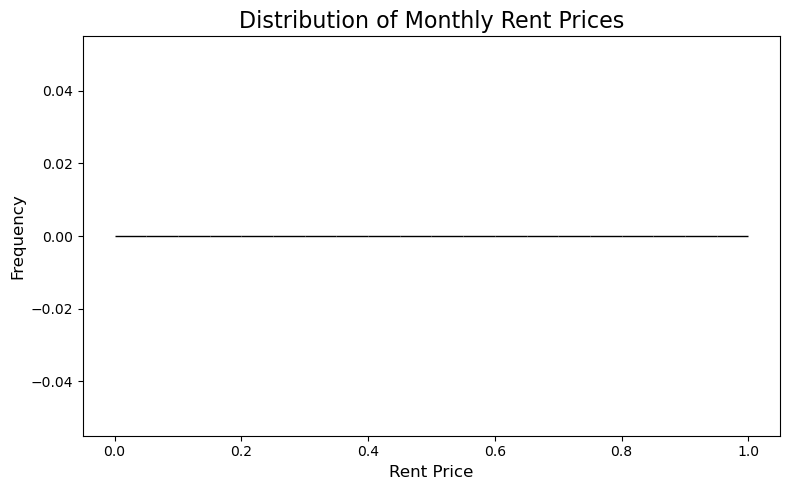

In [225]:
# Extract the 'price' column for plotting
prices = monthly_rent['price']

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(prices, bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Monthly Rent Prices', fontsize=16)
plt.xlabel('Rent Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [226]:
# Filter for rows where rent_type is 'سنوي' and
yearly_rent = realEstate[realEstate['rent_type'] == 'سنوي']

# Group by 'region' and find the minimum price
min_yearly_price_by_region = yearly_rent .groupby('region')['price'].min()

In [227]:
min_yearly_price_by_region

region
جنوب-الرياض    11500
شرق-الرياض     10000
شمال-الرياض    10000
غرب-الرياض     10000
وسط-الرياض     10000
Name: price, dtype: int64

In [228]:
# Group by 'region' and find the maxmum price
max_yearly_price_by_region = yearly_rent .groupby('region')['price'].max()

In [229]:
max_yearly_price_by_region

region
جنوب-الرياض     95000
شرق-الرياض     350000
شمال-الرياض    450000
غرب-الرياض     180000
وسط-الرياض      98500
Name: price, dtype: int64

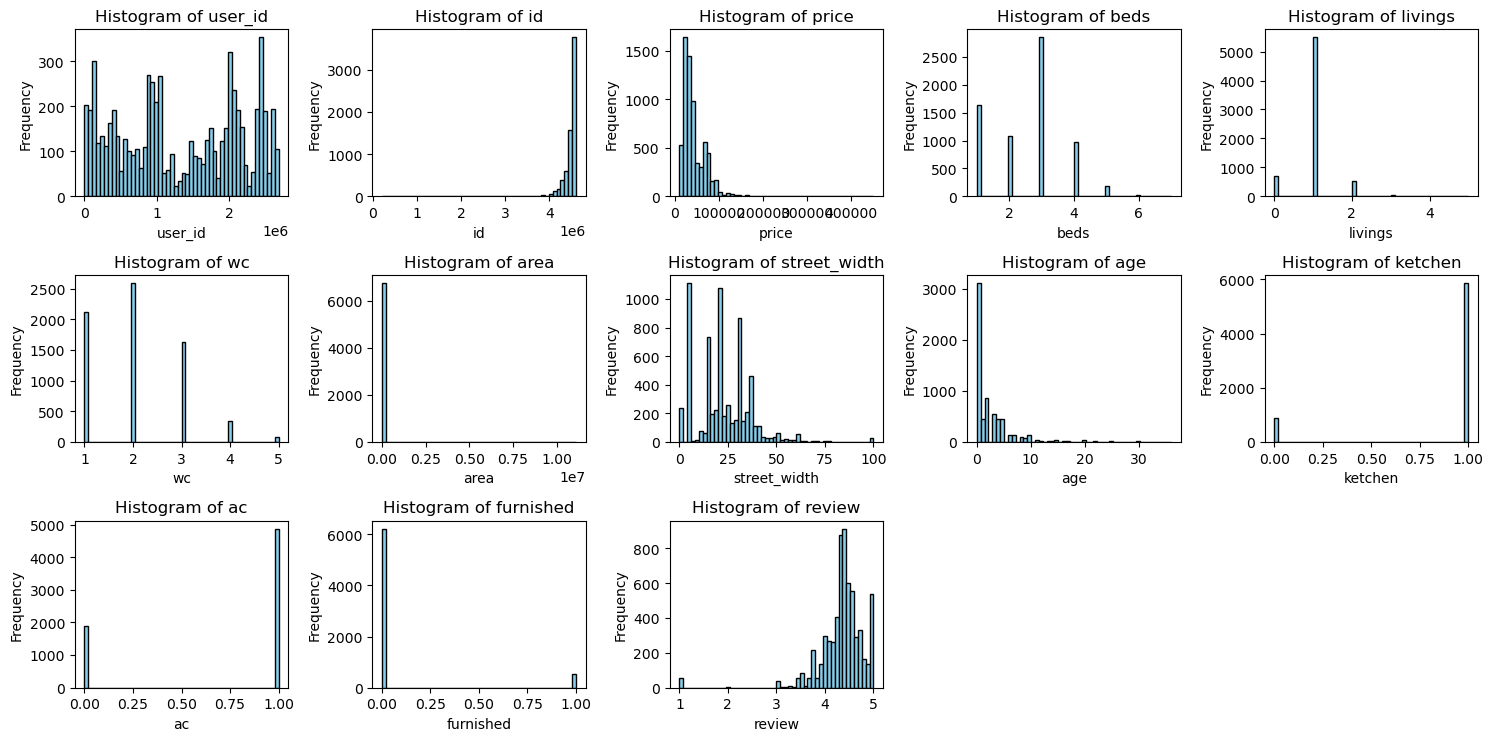

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))

# Filter for numeric columns
numeric_columns = realEstate.select_dtypes(include=['number']).columns

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 5, i)  # Adjust this based on the number of columns
    plt.hist(realEstate[column].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


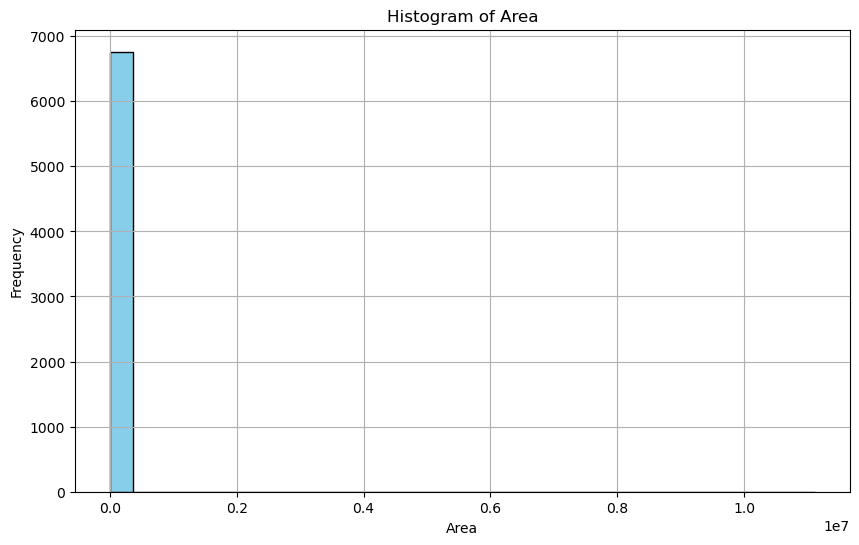

In [231]:
plt.figure(figsize=(10, 6))
plt.hist(realEstate['area'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

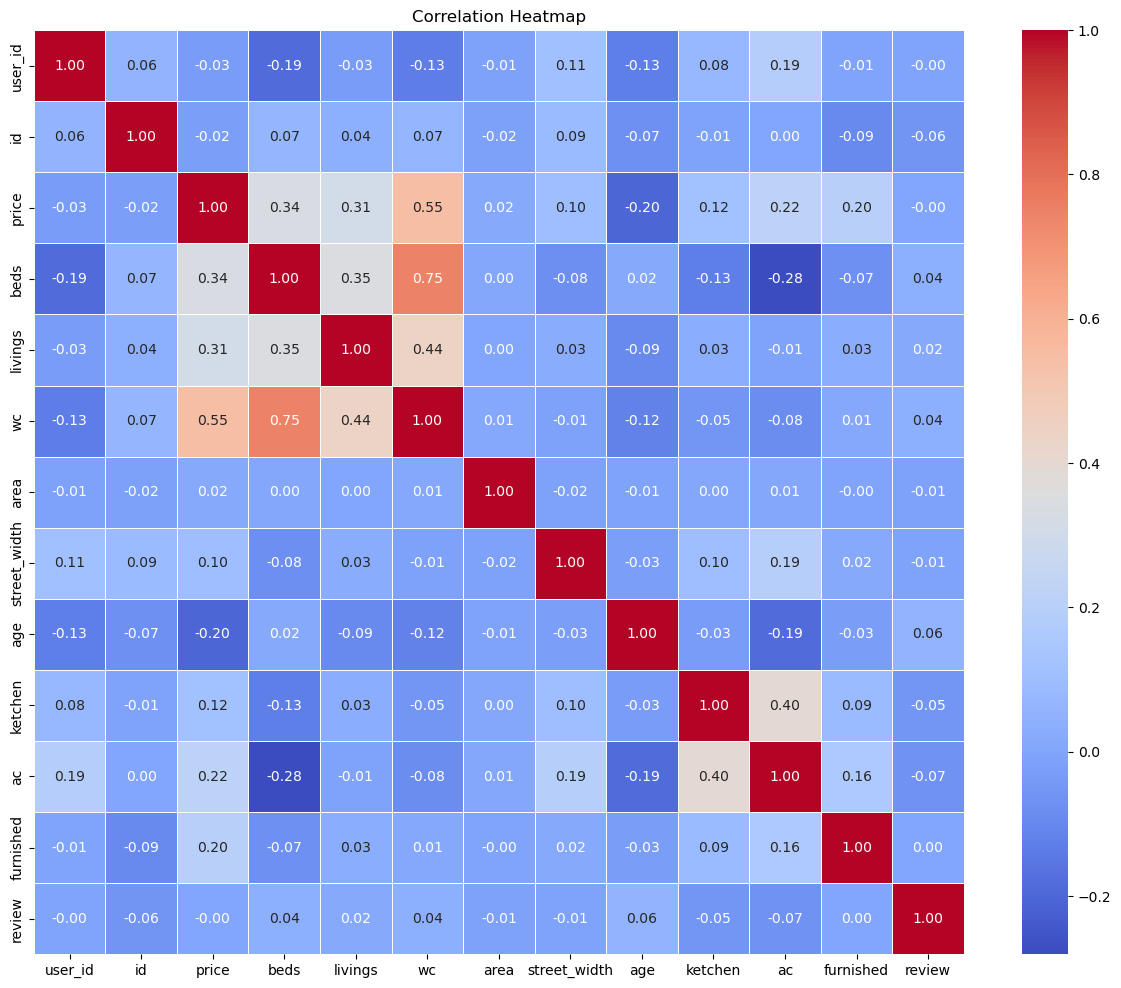

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = realEstate[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


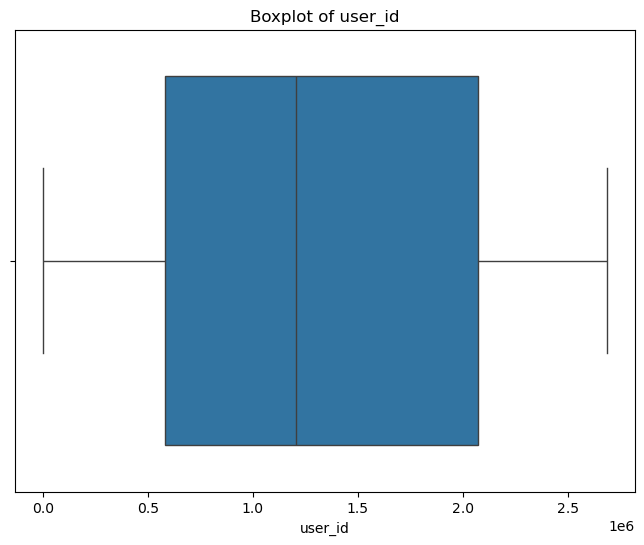

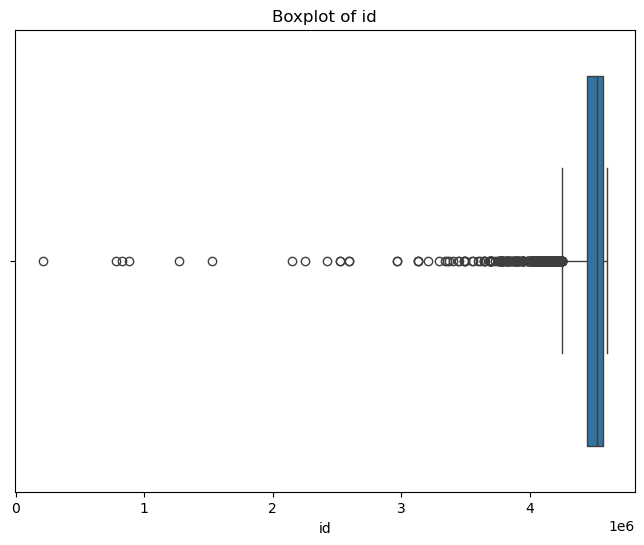

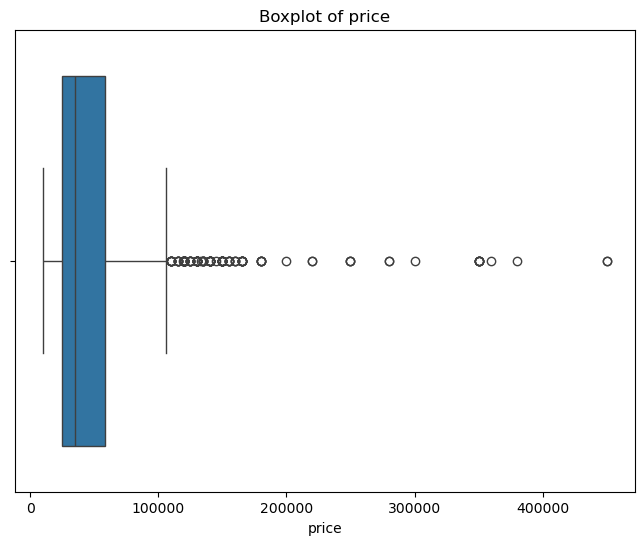

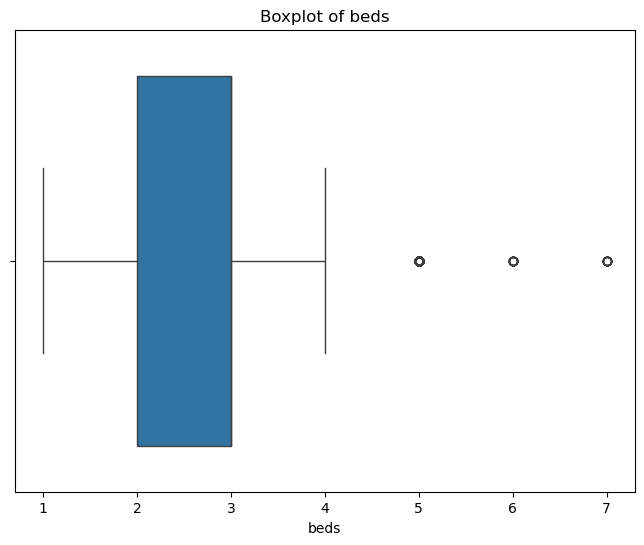

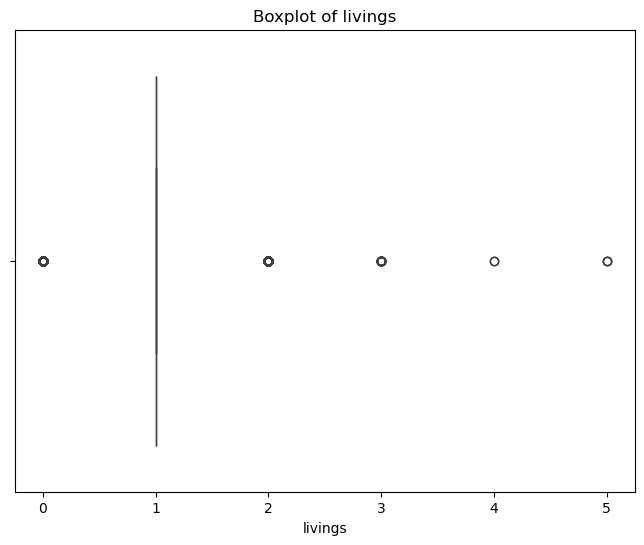

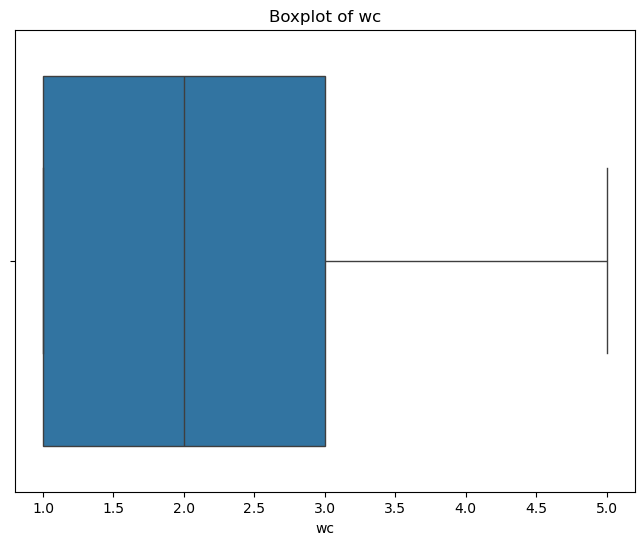

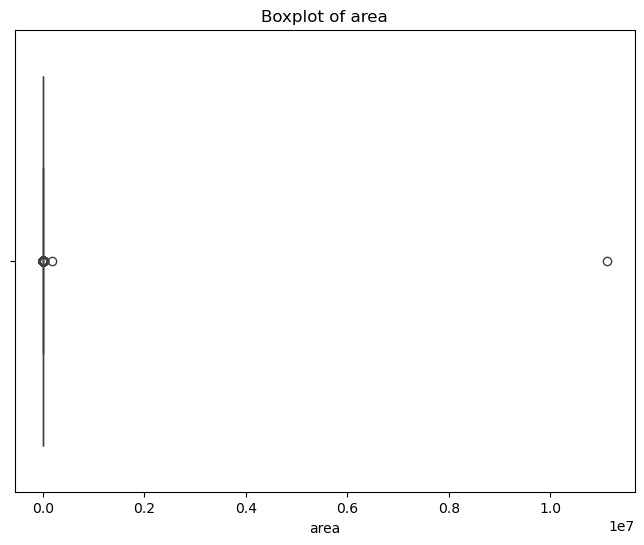

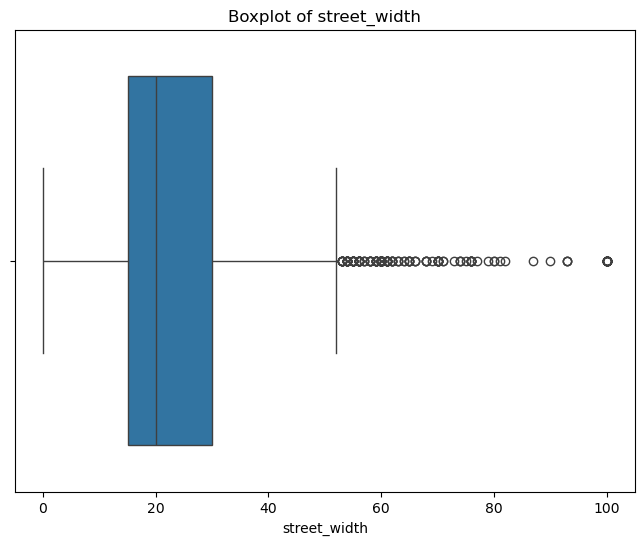

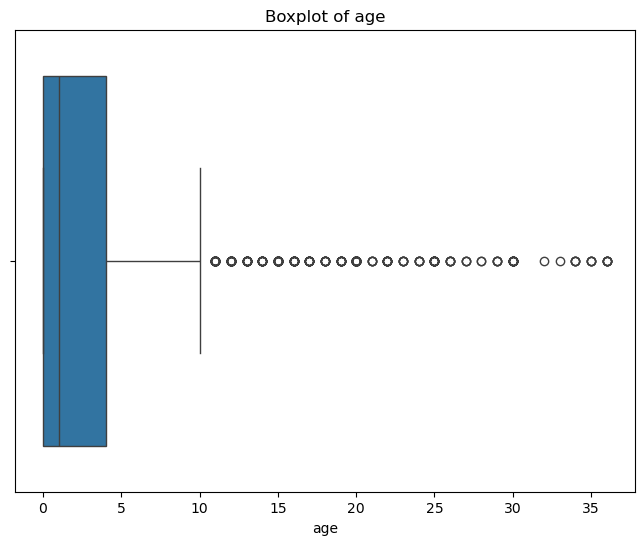

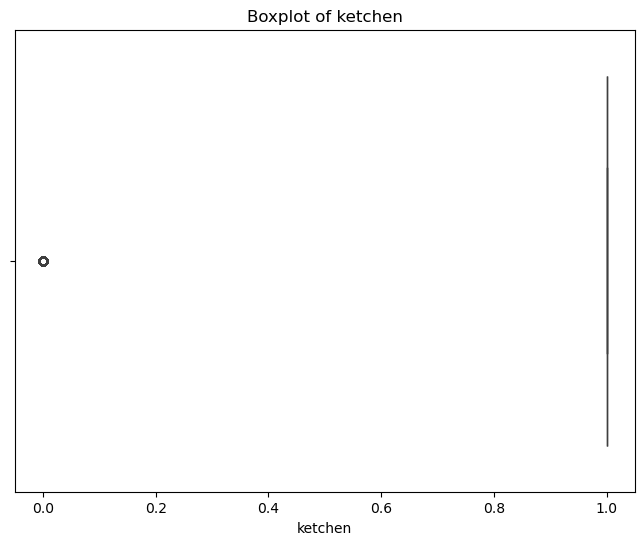

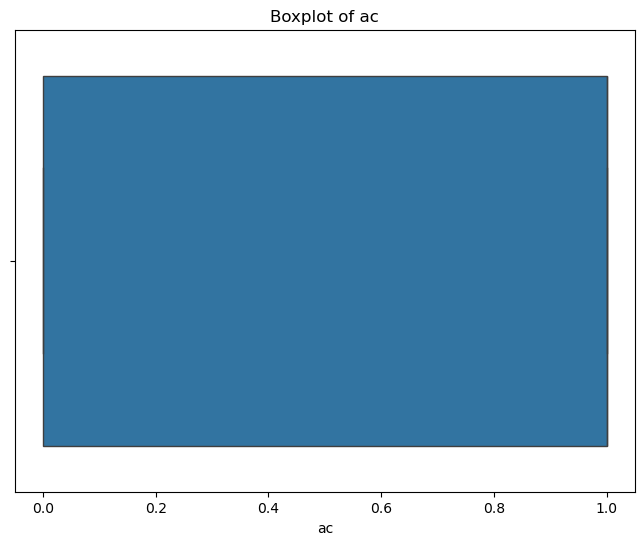

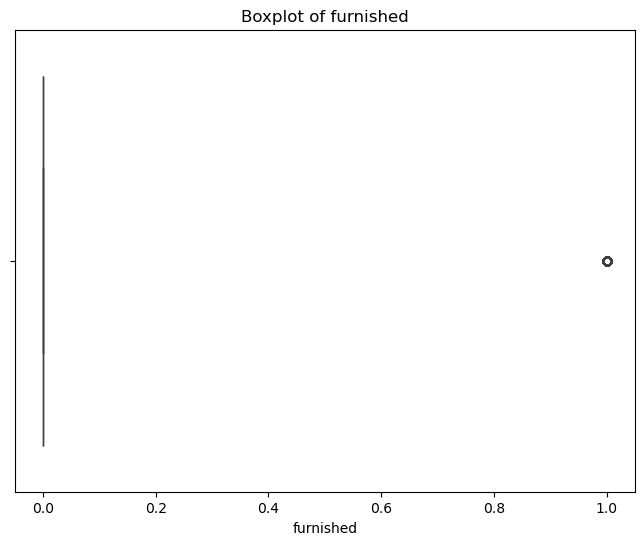

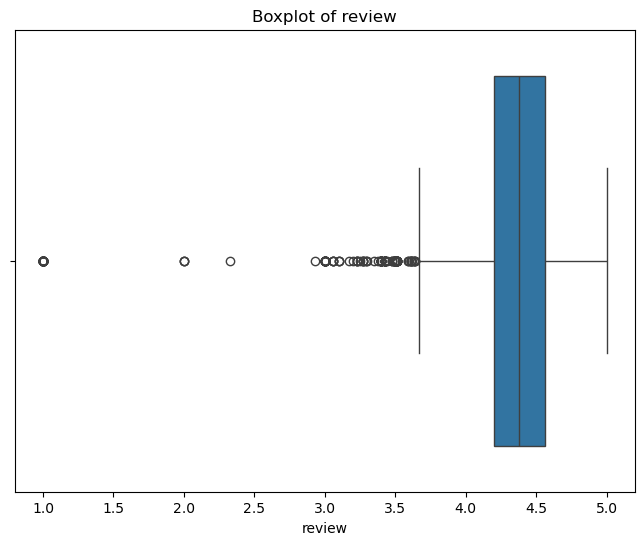

In [233]:
import seaborn as sns

# Plot boxplot to visualize outliers before removal
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=realEstate[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [234]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = realEstate['area'].quantile(0.25)
    Q3 = realEstate['area'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame by keeping only the rows within the bounds
    realEstate = realEstate[(realEstate['area'] >= lower_bound) & (realEstate['area'] <= upper_bound)]

In [235]:
realEstate.shape

(6361, 19)

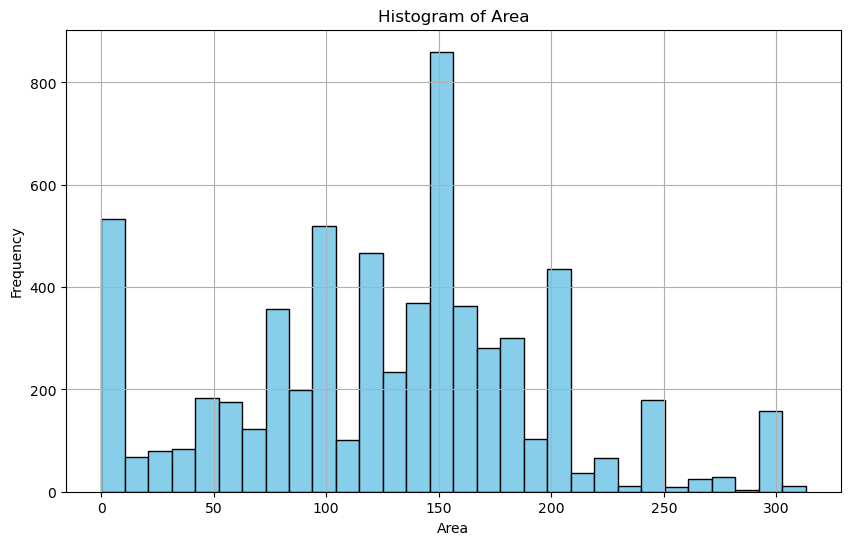

In [236]:
plt.figure(figsize=(10, 6))
plt.hist(realEstate['area'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [237]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = realEstate['age'].quantile(0.25)
    Q3 = realEstate['age'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame by keeping only the rows within the bounds
    realEstate = realEstate[(realEstate['age'] >= lower_bound) & (realEstate['age'] <= upper_bound)]

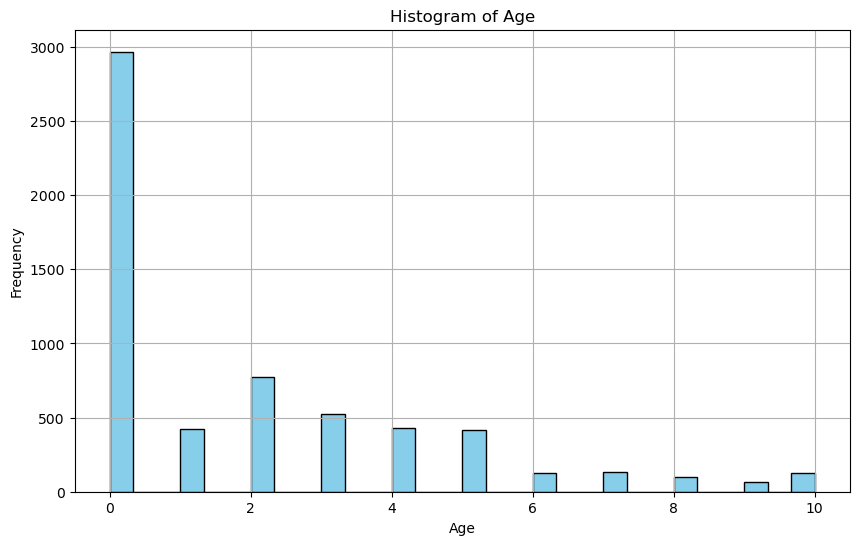

In [238]:
plt.figure(figsize=(10, 6))
plt.hist(realEstate['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [239]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = realEstate['street_width'].quantile(0.25)
    Q3 = realEstate['street_width'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame by keeping only the rows within the bounds
    realEstate = realEstate[(realEstate['street_width'] >= lower_bound) & (realEstate['street_width'] <= upper_bound)]

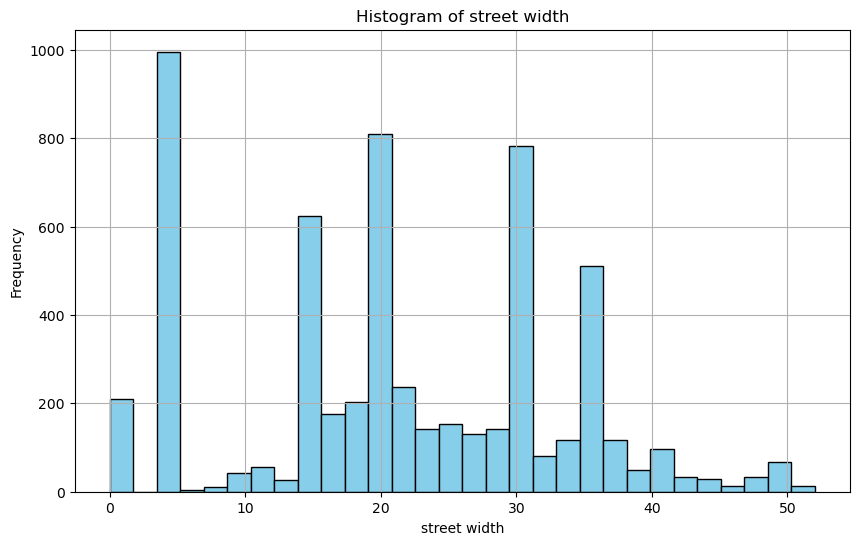

In [240]:
plt.figure(figsize=(10, 6))
plt.hist(realEstate['street_width'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of street width')
plt.xlabel('street width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [241]:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = realEstate['price'].quantile(0.25)
    Q3 = realEstate['price'].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame by keeping only the rows within the bounds
    realEstate = realEstate[(realEstate['price'] >= lower_bound) & (realEstate['price'] <= upper_bound)]

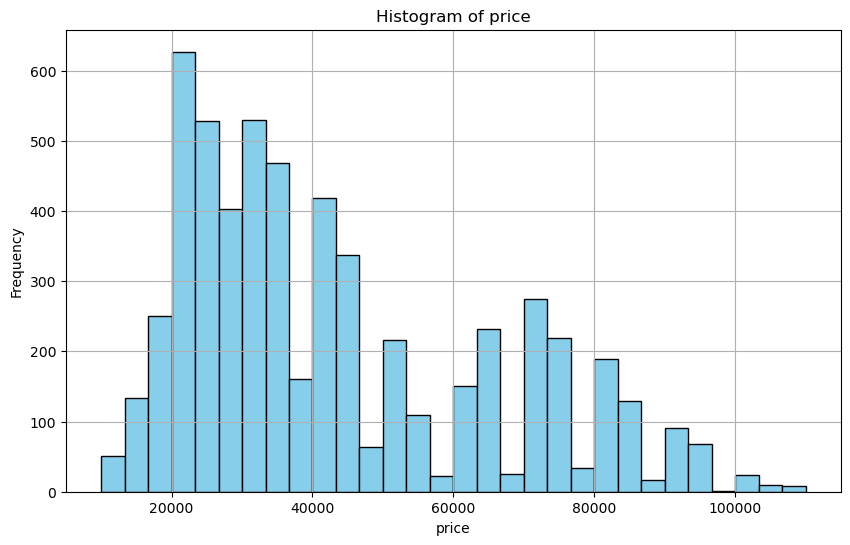

In [242]:
plt.figure(figsize=(10, 6))
plt.hist(realEstate['price'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

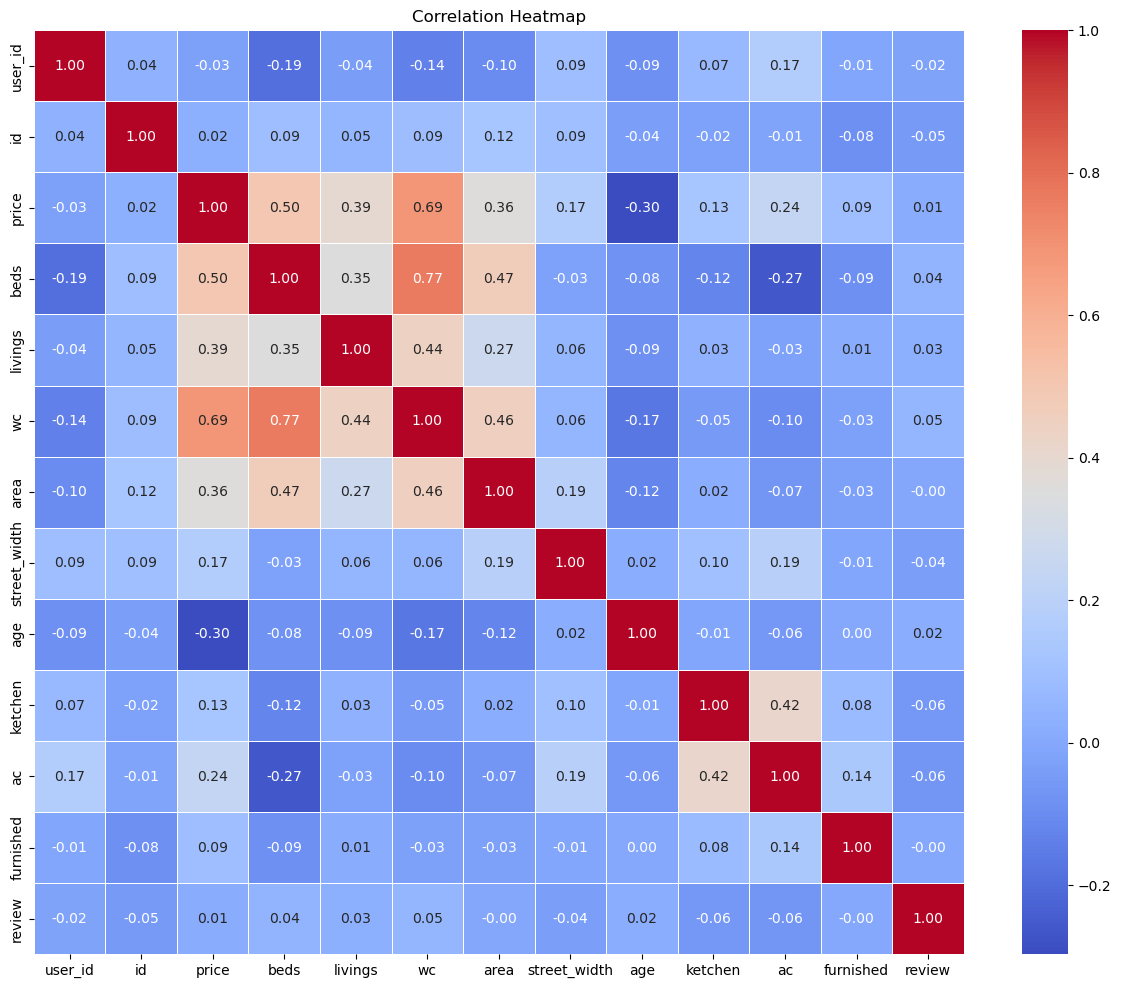

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = realEstate[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


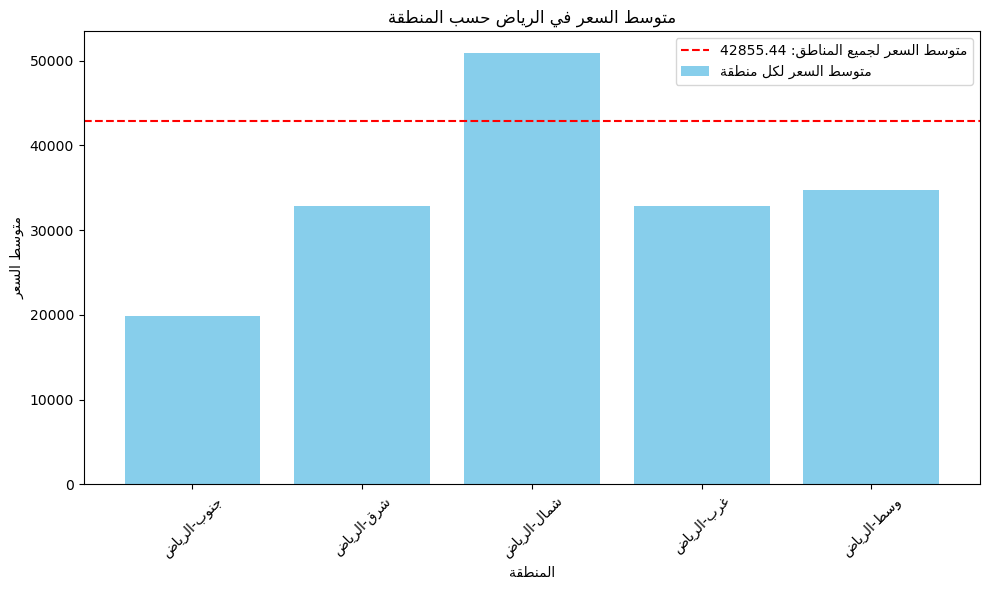

In [244]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Assuming realEstate is a DataFrame with 'region' (Arabic) and 'price' columns
avg_price_per_region = realEstate.groupby('region')['price'].mean()
avg_price_all_areas = realEstate['price'].mean()

# Reshaping Arabic text for proper display
reshaped_regions = [arabic_reshaper.reshape(region) for region in avg_price_per_region.index]
bidi_regions = [get_display(region) for region in reshaped_regions]

# Plotting the chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting average price per region
ax.bar(bidi_regions, avg_price_per_region, color='skyblue', label=get_display(arabic_reshaper.reshape("متوسط السعر لكل منطقة")))

# Adding a horizontal line for the overall average price
ax.axhline(avg_price_all_areas, color='red', linestyle='--', label=get_display(arabic_reshaper.reshape(f"متوسط السعر لجميع المناطق: {avg_price_all_areas:.2f}")))

# Adding labels and title (in Arabic)
ax.set_xlabel(get_display(arabic_reshaper.reshape("المنطقة")))
ax.set_ylabel(get_display(arabic_reshaper.reshape("متوسط السعر")))
ax.set_title(get_display(arabic_reshaper.reshape("متوسط السعر في الرياض حسب المنطقة")))

# Adding an Arabic legend
ax.legend(loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [245]:
realEstate.columns

Index(['user_id', 'id', 'price', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'ketchen', 'ac', 'furnished', 'district',
       'review', 'IsRent', 'apartment_type', 'street_name', 'region',
       'rent_type'],
      dtype='object')

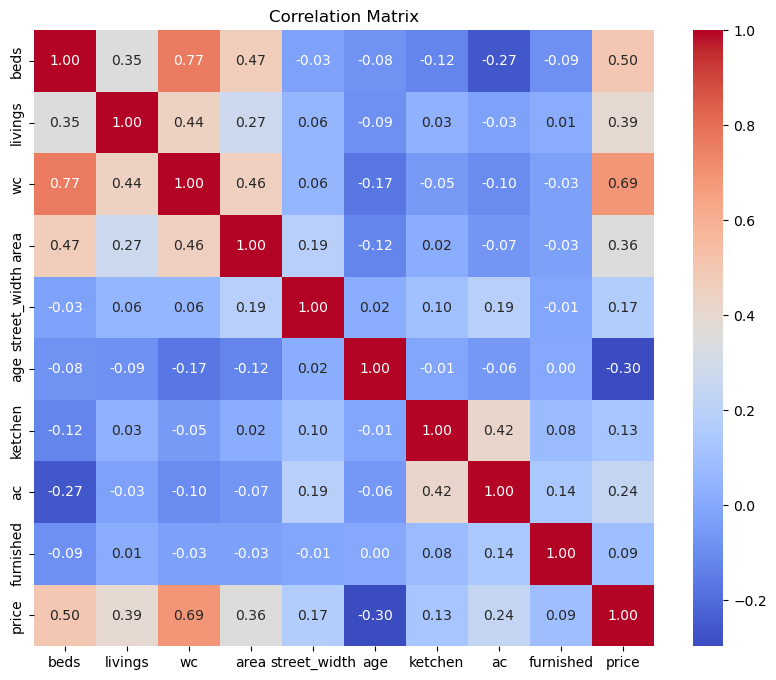

In [246]:
# Correct column name for 'kitchen'
numeric_columns = ['beds', 'livings', 'wc', 'area', 'street_width', 'age', 'ketchen', 'ac', 'furnished', 'price']

# Create a correlation matrix for only numeric columns
correlation_matrix = realEstate[numeric_columns].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


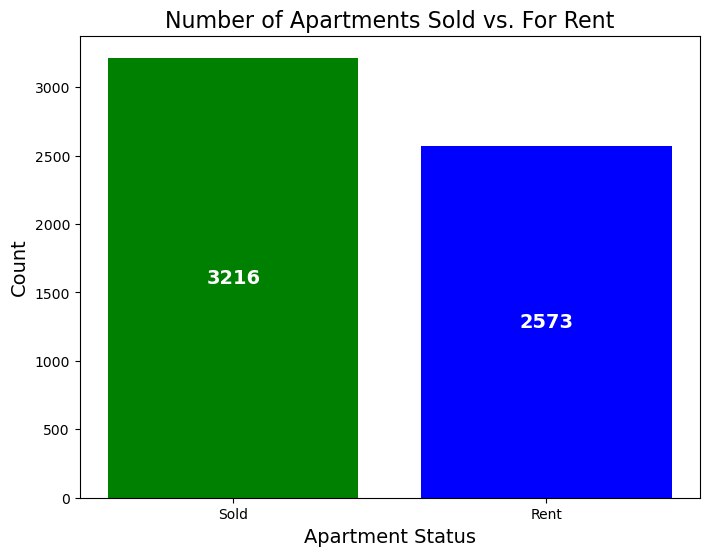

In [247]:
#How many apartments have been sold?
# Count the number of apartments for rent and sold
sold_count = realEstate[realEstate['IsRent'] == 0].shape[0]
rent_count = realEstate[realEstate['IsRent'] == 1].shape[0]

# Data for the bar chart
categories = ['Sold', 'Rent']
counts = [sold_count, rent_count]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['green', 'blue'])

# Add text annotations (counts) inside the bars with adjustments for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 2,  # Position the text in the center of the bar
             str(int(yval)), ha='center', va='center', color='white', fontsize=14, fontweight='bold')

plt.title('Number of Apartments Sold vs. For Rent', fontsize=16)
plt.xlabel('Apartment Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

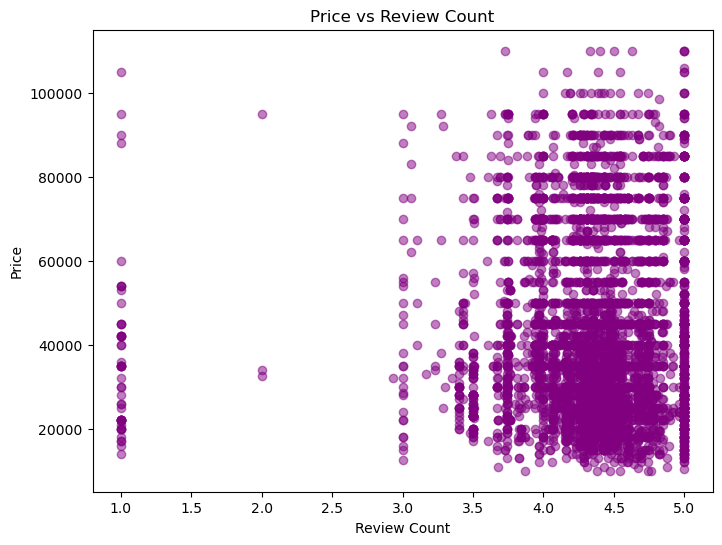

In [248]:
#Does review increase the chart?

# Check the correlation between reviews and price (if 'review_count' exists in your dataset)
correlation_reviews_price = realEstate[numeric_columns].corr()
# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(realEstate['review'], realEstate['price'], color='purple', alpha=0.5)
plt.title('Price vs Review Count')
plt.xlabel('Review Count')
plt.ylabel('Price')
plt.show()


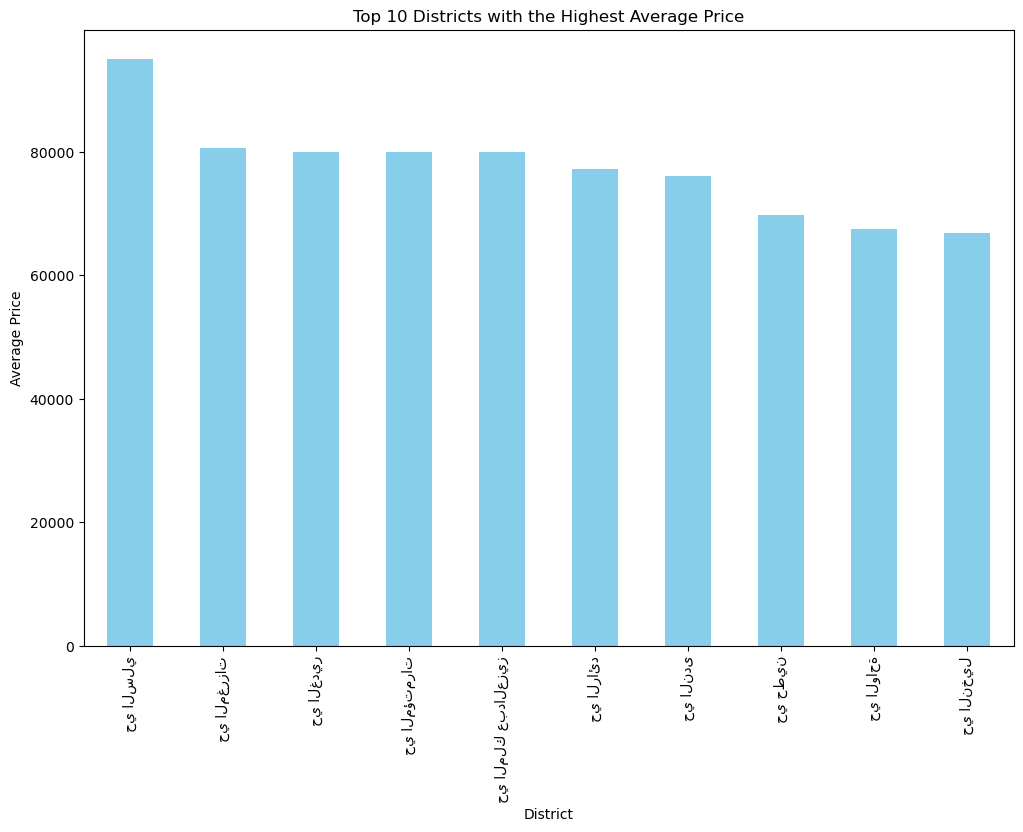

In [249]:
#Top 10 Districts with the Highest Average Price
# Calculate the average price for each district
avg_price_by_district = realEstate.groupby('district')['price'].mean().sort_values(ascending=False)

# Get the top 10 districts with the highest average prices
top_10_districts = avg_price_by_district.head(10)

# Create a bar chart for the top 10 districts with the highest average price
plt.figure(figsize=(12, 8))
top_10_districts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Districts with the Highest Average Price')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


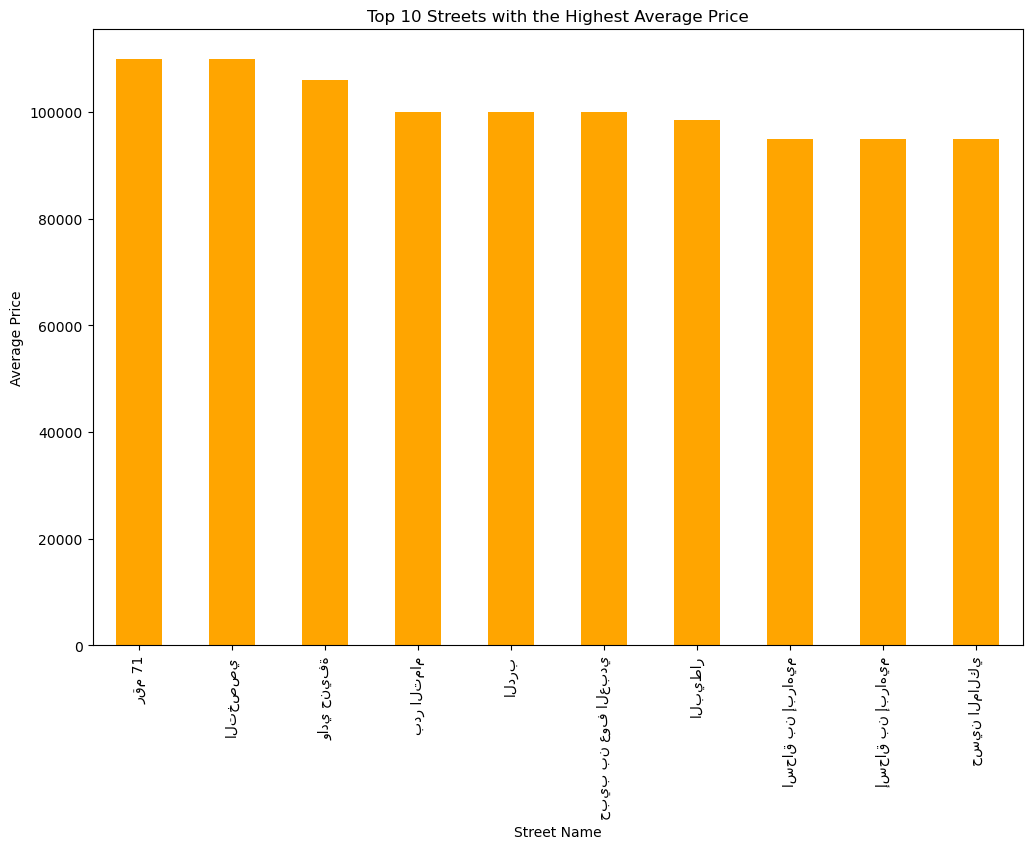

In [250]:
# Calculate the average price for each street
avg_price_by_street = realEstate.groupby('street_name')['price'].mean().sort_values(ascending=False)

# Get the top 10 streets with the highest average prices
top_10_streets = avg_price_by_street.head(10)

# Create a bar chart for the top 10 streets with the highest average price
plt.figure(figsize=(12, 8))
top_10_streets.plot(kind='bar', color='orange')
plt.title('Top 10 Streets with the Highest Average Price')
plt.xlabel('Street Name')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


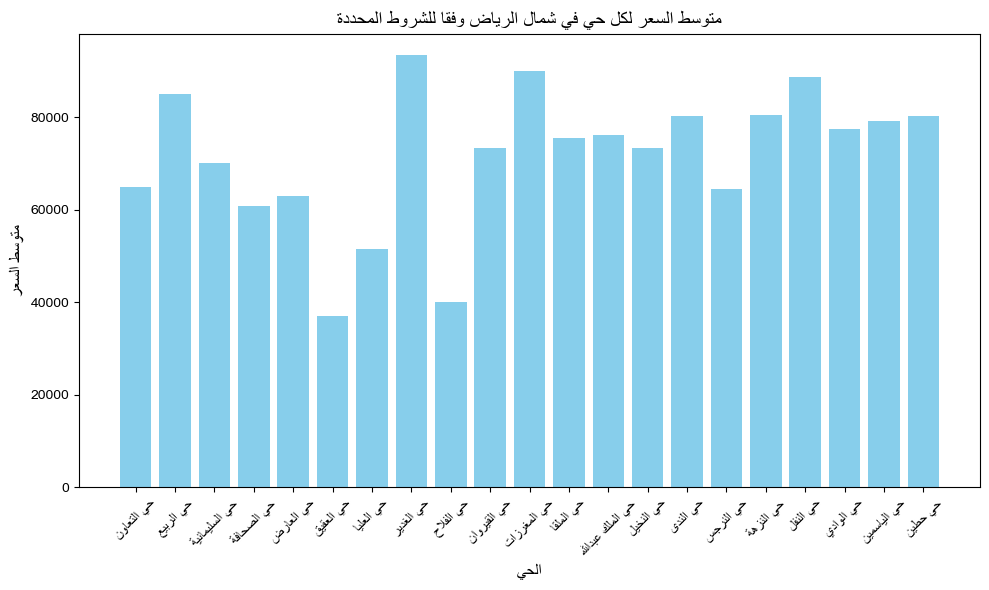

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from matplotlib import rcParams

# Set the font to one that supports Arabic
rcParams['font.family'] = 'Arial'  # Replace 'Arial' with your installed Arabic-supporting font

# Assuming realEstate is a DataFrame with the required columns
# Filtering the DataFrame based on the specified conditions
filtered_data = realEstate[
    (realEstate['region'] == 'شمال-الرياض') &
    (realEstate['beds'] == 3) &
    (realEstate['wc'] == 3) &
    (realEstate['age'] < 3) &
    (realEstate['ketchen'] == 1.0) &
    (realEstate['rent_type'] == 'سنوي')
]

# Grouping the filtered data by district and calculating the average price
avg_price_per_district = filtered_data.groupby('district')['price'].mean()

# Reshaping Arabic district names for proper display
reshaped_district = [arabic_reshaper.reshape(district) for district in avg_price_per_district.index]
bidi_district = [get_display(district) for district in reshaped_district]

# Plotting the chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting average price per district
ax.bar(bidi_district, avg_price_per_district, color='skyblue')

# Adding labels and title (in Arabic)
ax.set_xlabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=12)
ax.set_ylabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=12)
ax.set_title(get_display(arabic_reshaper.reshape("متوسط السعر لكل حي في شمال الرياض وفقًا للشروط المحددة")), fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as an image file (optional)
plt.savefig("average_price_per_district.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [302]:
filtered_data = realEstate[
    (realEstate['region'] == 'شمال-الرياض') &
    (realEstate['wc'] == 3) &
    (realEstate['age'] == 0) &
    (realEstate['ketchen'] == 1.0) &
    (realEstate['rent_type'] == 'سنوي')
]

In [332]:
filtered_data= riyadh_all_aqaar[riyadh_all_aqaar['Property Type'] =='فيلا']
riyadh_all_aqaar['Neighborhood']


,Property Type,Purpose,City,Neighborhood,Facade,Area,Price per Meter,Total Price,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Hallway,Kitchen,Maid Room,Driver Room,Annex,Yard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price1,Floor,Property Age,Furnished,Final Price
0,أرض,NaN,الرياض,الرياض,غربية,375.0,2900.0,1087500.0,NaN,NaN,NaN,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,لايوجد,NaN,NaN,1087500.0
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800.0,4800.0,3840000.0,NaN,NaN,NaN,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,لايوجد,NaN,NaN,3840000.0
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750.0,3200.0,2400000.0,NaN,NaN,NaN,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,لايوجد,NaN,NaN,2400000.0
6,أرض,تجاري وسكني,الرياض,حي الرمال,شمالية,900.0,3300.0,2970000.0,NaN,NaN,NaN,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,لايوجد,NaN,NaN,2970000.0
7,أرض,تجاري وسكني,الرياض,حي الملك فيصل,شرقية,750.0,3350.0,2512500.0,NaN,NaN,NaN,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,لايوجد,NaN,NaN,2512500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,شقة,NaN,الرياض,حي الصحافة,NaN,201.0,NaN,NaN,3,1.0,3,0.0,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,1100000.0,غير معروف,9.0,0.0,1100000.0
3792,شقة,NaN,الرياض,حي المروج,NaN,127.0,NaN,NaN,3,1.0,3,0.0,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,1600000.0,غير معروف,0.0,1.0,1600000.0
3793,شقة,NaN,الرياض,حي الملقا,غربية,158.0,NaN,NaN,3,1.0,3,0.0,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,1398000.0,غير معروف,0.0,0.0,1398000.0
3794,شقة,NaN,الرياض,حي القيروان,NaN,120.0,NaN,NaN,2,1.0,3,0.0,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,925000.0,غير معروف,0.0,0.0,925000.0


In [396]:
search_terms = [
"حي الملقا",
    "حي النرجس",
    "حي العارض",
    "حي الياسمين",
    "حي الصحافة",
    "حي العقيق",
    "حي القيروان",
    "حي العليا",
    "حي حطين",
    "حي السليمانية",
    "حي المصيف",
    "حي التعاون",
    "حي الربيع",
    "حي الفلاح",
    "حي الوادي",
    "حي النزهة",
    "حي الملك عبدالله",
    "حي الندى",
    "حي الغدير",
    "حي الورود",
    "حي الملك فهد",
    "حي المروج",
    "حي النفل",
    "حي الرحمانية",
    "حي المرسلات",
    "حي النخيل",
    "حي الواحة",
    "حي المغرزات",
    "حي المؤتمرات",
    "حي المحمدية",
    "حي الملك خالد الدولي",
    "حي صلاح الدين",
    "حي المعذر الشمالي",
    "حي بنبان",
    "حي جامعة الامام محمد بن سعود الاسلامية",
    "حي جامعة الملك سعود",
    "حي جامعة الأميرة نورة",
    "حي مركز الملك عبدالله للدراسات والبحوث"
]

In [512]:
filtered_data = riyadh_all_aqaar[
    (riyadh_all_aqaar['Property Type'] == 'فيلا') & 
    (riyadh_all_aqaar['City'] == 'الرياض') & 
    (riyadh_all_aqaar['Neighborhood'].str.strip().isin(search_terms))
]

In [390]:
filtered_data

,Property Type,Purpose,City,Neighborhood,Facade,Area,Price per Meter,Total Price,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Hallway,Kitchen,Maid Room,Driver Room,Annex,Yard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price1,Floor,Property Age,Furnished,Final Price
2155,فيلا,NaN,الرياض,حي العارض,جنوبية,244.0,NaN,NaN,6,3,5+,0.0,1,1,1,1,0,1,0,0,1,1,2300000.0,لايوجد,NaN,NaN,2300000.0
2156,فيلا,NaN,الرياض,حي العارض,جنوبية,322.0,NaN,NaN,6,4,5+,0.0,1,1,1,1,1,1,0,0,1,1,3000000.0,لايوجد,NaN,NaN,3000000.0
2157,فيلا,NaN,الرياض,حي العارض,جنوبية,350.0,NaN,NaN,3,2,5+,0.0,1,0,1,0,1,0,0,1,1,1,2600000.0,لايوجد,NaN,NaN,2600000.0
2158,فيلا,NaN,الرياض,حي النرجس,جنوبية,350.0,NaN,NaN,4,4,4,0.0,1,1,1,0,0,1,0,1,1,1,2600000.0,لايوجد,NaN,NaN,2600000.0
2159,فيلا,NaN,الرياض,حي العارض,غربية,270.0,NaN,NaN,4,1,5+,0.0,1,1,1,1,0,0,0,0,1,0,2800000.0,لايوجد,NaN,NaN,2800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,فيلا,NaN,الرياض,حي الصحافة,شرقية,600.0,NaN,NaN,5,1,5+,15.0,0,1,1,1,1,1,0,0,1,0,4500000.0,لايوجد,NaN,NaN,4500000.0
2398,فيلا,NaN,الرياض,حي الصحافة,شمالية,375.0,NaN,NaN,6,2,5+,15.0,1,1,1,1,1,0,0,0,1,1,4880000.0,لايوجد,NaN,NaN,4880000.0
2400,فيلا,NaN,الرياض,حي الوادي,غربية,375.0,NaN,NaN,5,3,5+,0.0,1,1,1,1,0,0,0,0,1,0,2200000.0,لايوجد,NaN,NaN,2200000.0
2401,فيلا,NaN,الرياض,حي النرجس,شمالية,312.0,NaN,NaN,5,2,5+,15.0,1,1,1,0,1,0,0,0,1,0,2550000.0,لايوجد,NaN,NaN,2550000.0


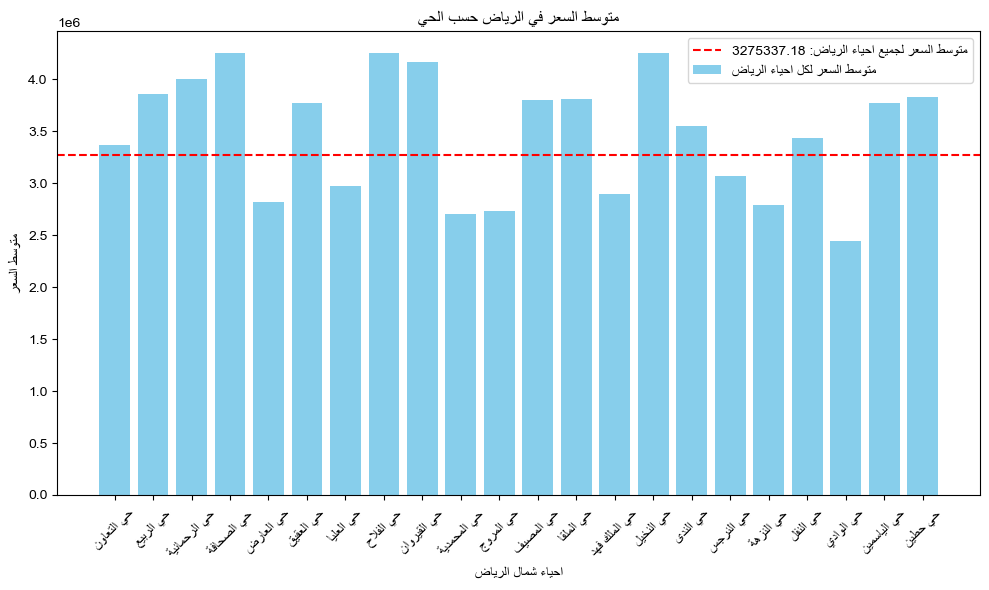

In [514]:


# Assuming realEstate is a DataFrame with 'region' (Arabic) and 'price' columns
avg_price_per_Neighborhood =filtered_data.groupby('Neighborhood')['Final Price'].mean()
avg_price_all_areas = filtered_data['Final Price'].mean()

# Reshaping Arabic text for proper display
reshaped_Neighborhood = [arabic_reshaper.reshape(Neighborhood) for Neighborhood in avg_price_per_Neighborhood.index]
bidi_Neighborhood = [get_display(Neighborhood) for Neighborhood in reshaped_Neighborhood]

# Plotting the chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting average price per region
ax.bar(bidi_Neighborhood, avg_price_per_Neighborhood, color='skyblue', label=get_display(arabic_reshaper.reshape("متوسط السعر لكل احياء الرياض")))

# Adding a horizontal line for the overall average price
ax.axhline(avg_price_all_areas, color='red', linestyle='--', label=get_display(arabic_reshaper.reshape(f"متوسط السعر لجميع احياء الرياض: {avg_price_all_areas:.2f}")))

# Adding labels and title (in Arabic)
ax.set_xlabel(get_display(arabic_reshaper.reshape("احياء شمال الرياض")))
ax.set_ylabel(get_display(arabic_reshaper.reshape("متوسط السعر")))
ax.set_title(get_display(arabic_reshaper.reshape("متوسط السعر في الرياض حسب الحي")))

# Adding an Arabic legend
ax.legend(loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [504]:
filtered_data1 = riyadh_all_aqaar[
    (riyadh_all_aqaar['Property Type'] == 'فيلا') & 
    (riyadh_all_aqaar['City'] == 'الرياض') & 
    (riyadh_all_aqaar['Neighborhood'].str.strip().isin(search_terms)) & 
    (riyadh_all_aqaar['Number of Rooms'] ==5) &
    (riyadh_all_aqaar['Kitchen'] == 1) &
 (riyadh_all_aqaar['Number of Bathrooms'] == '5+') &
 (riyadh_all_aqaar['Yard'] == 1) &
   (riyadh_all_aqaar['Number of Living Rooms'] == 2)
 
   
]

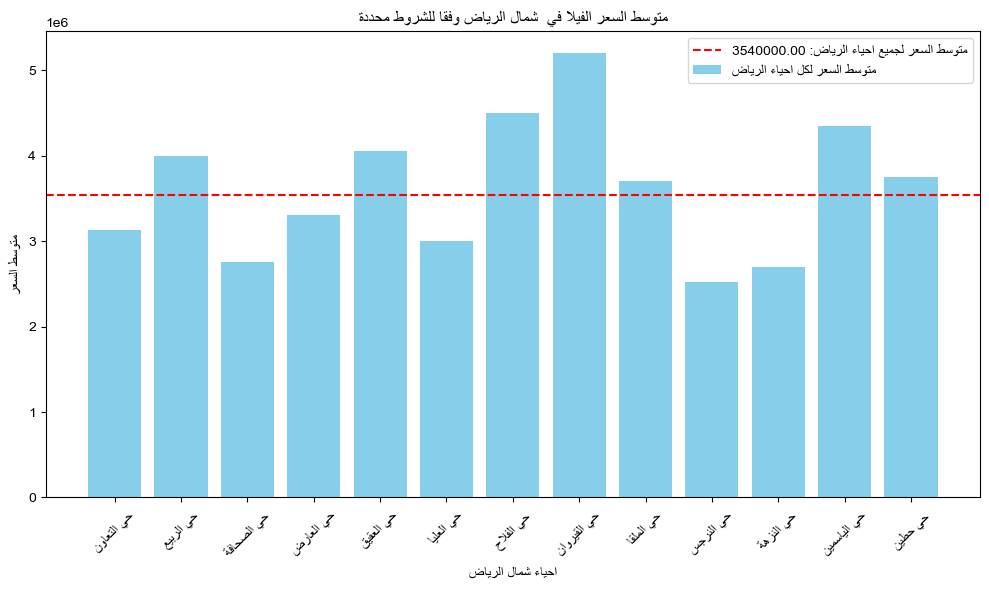

In [508]:


avg_price_per_Neighborhood =filtered_data1.groupby('Neighborhood')['Final Price'].mean()
avg_price_all_areas = filtered_data1['Final Price'].mean()

# Reshaping Arabic text for proper display
reshaped_Neighborhood = [arabic_reshaper.reshape(Neighborhood) for Neighborhood in avg_price_per_Neighborhood.index]
bidi_Neighborhood = [get_display(Neighborhood) for Neighborhood in reshaped_Neighborhood]

# Plotting the chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting average price 
ax.bar(bidi_Neighborhood, avg_price_per_Neighborhood, color='skyblue', label=get_display(arabic_reshaper.reshape("متوسط السعر لكل احياء الرياض")))

# Adding a horizontal line for the overall average price
ax.axhline(avg_price_all_areas, color='red', linestyle='--', label=get_display(arabic_reshaper.reshape(f"متوسط السعر لجميع احياء الرياض: {avg_price_all_areas:.2f}")))

# Adding labels and title (in Arabic)
ax.set_xlabel(get_display(arabic_reshaper.reshape("احياء شمال الرياض")))
ax.set_ylabel(get_display(arabic_reshaper.reshape("متوسط السعر")))
ax.set_title(get_display(arabic_reshaper.reshape("متوسط السعر الفيلا في  شمال الرياض وفقًا للشروط محددة")))

# Adding an Arabic legend
ax.legend(loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()